In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option("display.max_colwidth", None)

In [5]:
ruta = "C:\\Users\\LENOVO\\Desktop\\Jacobo\\DATOS PISOS\\PROYECTO FINAL\\COMPRA\\ANALISIS\\datos_analizar_compra.csv"
datos_compra = pd.read_csv(ruta, encoding='utf-8', sep=None, engine='python' )

In [6]:
ruta = "C:\\Users\\LENOVO\\Desktop\\Jacobo\\DATOS PISOS\\PROYECTO FINAL\\COMPRA\\ANALISIS\\datos_analizar_compra.csv"
datos_compra_r = pd.read_csv(ruta, encoding='utf-8', sep=None, engine='python' )

Crear una copia para hacer las pruebas

Sacar tipo de vivienda y viviendas -- hecho

Eliminar : -- hecho
· Localización
· Nulos
· calle

Cabiar nombres de columnas:
· superficie_m2 -- hecho

Convertir en int:
· su -- hecho


In [7]:
datos_compra.head(5)

,id,titulo,localización,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,calle,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT
0,107264664,Piso en venta en calle Mayor,Sol,1690000,145.0,2.0,2.0,True,Segunda mano/buen estado,True,Norte,1900.0,Gas natural,True,Calle Mayor,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN
1,108324155,Ático en venta en calle de las Aguas,Palacio,895000,106.0,2.0,NaN,True,Segunda mano/buen estado,True,NaN,1940.0,Gas natural,True,Calle de las Aguas,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior
2,105521069,Piso en venta en calle de Noblejas,Palacio,1495000,164.0,3.0,3.0,False,Segunda mano/buen estado,False,Norte,1989.0,NaN,True,Calle de Noblejas,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior
3,106506235,Piso en venta en plaza de Lavapiés,Lavapiés-Embajadores,723000,123.0,5.0,2.0,False,Segunda mano/buen estado,True,Oeste,1900.0,Gas natural,True,Plaza de Lavapiés,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior
4,107684577,Piso en venta en calle de San Gregorio,Chueca-Justicia,2450000,166.0,2.0,2.0,False,Segunda mano/buen estado,True,Sur,1900.0,Eléctrica,True,Calle de San Gregorio,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior


In [8]:
datos_compra['vivienda'] = datos_compra['titulo'].apply(lambda x: str(x).split()[0] if pd.notnull(x) and len(str(x).split()) > 0 else None)

In [9]:
datos_compra.head(5)

,id,titulo,localización,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,calle,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda
0,107264664,Piso en venta en calle Mayor,Sol,1690000,145.0,2.0,2.0,True,Segunda mano/buen estado,True,Norte,1900.0,Gas natural,True,Calle Mayor,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN,Piso
1,108324155,Ático en venta en calle de las Aguas,Palacio,895000,106.0,2.0,NaN,True,Segunda mano/buen estado,True,NaN,1940.0,Gas natural,True,Calle de las Aguas,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior,Ático
2,105521069,Piso en venta en calle de Noblejas,Palacio,1495000,164.0,3.0,3.0,False,Segunda mano/buen estado,False,Norte,1989.0,NaN,True,Calle de Noblejas,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso
3,106506235,Piso en venta en plaza de Lavapiés,Lavapiés-Embajadores,723000,123.0,5.0,2.0,False,Segunda mano/buen estado,True,Oeste,1900.0,Gas natural,True,Plaza de Lavapiés,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior,Piso
4,107684577,Piso en venta en calle de San Gregorio,Chueca-Justicia,2450000,166.0,2.0,2.0,False,Segunda mano/buen estado,True,Sur,1900.0,Eléctrica,True,Calle de San Gregorio,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso


In [10]:
datos_compra['habitaciones'] = datos_compra['habitaciones'].astype('Int64')
datos_compra['baños'] = datos_compra['baños'].astype('Int64')
datos_compra['superficie_m2'] = datos_compra['superficie_m2'].astype('Int64')
datos_compra['año_construccion'] = datos_compra['año_construccion'].astype('Int64')

In [11]:
datos_compra["precio_m2"] = datos_compra["precio"] / datos_compra["superficie_m2"]

# Redondear si quieres
datos_compra["precio_m2"] = datos_compra["precio_m2"].round(2)

# Ver primeras filas
print(datos_compra[["precio", "superficie_m2", "precio_m2"]].head())

    precio  superficie_m2  precio_m2
0  1690000            145   11655.17
1   895000            106     8443.4
2  1495000            164    9115.85
3   723000            123    5878.05
4  2450000            166   14759.04


In [12]:
datos_compra.head(5)

,id,titulo,localización,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,calle,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda,precio_m2
0,107264664,Piso en venta en calle Mayor,Sol,1690000,145,2,2,True,Segunda mano/buen estado,True,Norte,1900,Gas natural,True,Calle Mayor,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN,Piso,11655.17
1,108324155,Ático en venta en calle de las Aguas,Palacio,895000,106,2,<NA>,True,Segunda mano/buen estado,True,NaN,1940,Gas natural,True,Calle de las Aguas,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior,Ático,8443.4
2,105521069,Piso en venta en calle de Noblejas,Palacio,1495000,164,3,3,False,Segunda mano/buen estado,False,Norte,1989,NaN,True,Calle de Noblejas,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,9115.85
3,106506235,Piso en venta en plaza de Lavapiés,Lavapiés-Embajadores,723000,123,5,2,False,Segunda mano/buen estado,True,Oeste,1900,Gas natural,True,Plaza de Lavapiés,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior,Piso,5878.05
4,107684577,Piso en venta en calle de San Gregorio,Chueca-Justicia,2450000,166,2,2,False,Segunda mano/buen estado,True,Sur,1900,Eléctrica,True,Calle de San Gregorio,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,14759.04


In [13]:
columnas_a_eliminar = [
    'localización',
    'calle'
]
datos_compra.drop(columns=columnas_a_eliminar, inplace=True)

In [14]:
datos_compra.head(5)

,id,titulo,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda,precio_m2
0,107264664,Piso en venta en calle Mayor,1690000,145,2,2,True,Segunda mano/buen estado,True,Norte,1900,Gas natural,True,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN,Piso,11655.17
1,108324155,Ático en venta en calle de las Aguas,895000,106,2,<NA>,True,Segunda mano/buen estado,True,NaN,1940,Gas natural,True,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior,Ático,8443.4
2,105521069,Piso en venta en calle de Noblejas,1495000,164,3,3,False,Segunda mano/buen estado,False,Norte,1989,NaN,True,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,9115.85
3,106506235,Piso en venta en plaza de Lavapiés,723000,123,5,2,False,Segunda mano/buen estado,True,Oeste,1900,Gas natural,True,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior,Piso,5878.05
4,107684577,Piso en venta en calle de San Gregorio,2450000,166,2,2,False,Segunda mano/buen estado,True,Sur,1900,Eléctrica,True,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,14759.04


In [15]:
datos_compra.rename(columns={
    'superficie_m2': 'm2'
}, inplace=True)

In [16]:
datos_compra.head(5)

,id,titulo,precio,m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda,precio_m2
0,107264664,Piso en venta en calle Mayor,1690000,145,2,2,True,Segunda mano/buen estado,True,Norte,1900,Gas natural,True,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN,Piso,11655.17
1,108324155,Ático en venta en calle de las Aguas,895000,106,2,<NA>,True,Segunda mano/buen estado,True,NaN,1940,Gas natural,True,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior,Ático,8443.4
2,105521069,Piso en venta en calle de Noblejas,1495000,164,3,3,False,Segunda mano/buen estado,False,Norte,1989,NaN,True,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,9115.85
3,106506235,Piso en venta en plaza de Lavapiés,723000,123,5,2,False,Segunda mano/buen estado,True,Oeste,1900,Gas natural,True,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior,Piso,5878.05
4,107684577,Piso en venta en calle de San Gregorio,2450000,166,2,2,False,Segunda mano/buen estado,True,Sur,1900,Eléctrica,True,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,14759.04


In [17]:
print(datos_compra['vivienda'].unique())
print(datos_compra['estado'].unique())
print(datos_compra['barrio'].unique())

['Piso' 'Ático' 'Estudio' 'Dúplex' 'Casa' 'Chalet' 'Finca' 'Caserón']
['Segunda mano/buen estado' 'Segunda mano/para reformar' nan]
['Sol' 'Palacio' 'Lavapiés-Embajadores' 'Chueca-Justicia'
 'Malasaña-Universidad' 'Huertas-Cortes' 'Nueva España'
 'Bernabéu-Hispanoamérica' 'El Viso' 'Ciudad Jardín' 'Prosperidad'
 'Castilla' 'Gaztambide' 'Almagro' 'Nuevos Ministerios-Ríos Rosas'
 'Trafalgar' 'Arapiles' 'Vallehermoso' nan 'Aravaca' 'El Plantío'
 'Valdemarín' 'Argüelles' 'Ciudad Universitaria' 'Casa de Campo'
 'Valdezarza' 'Montealina' 'La Finca' 'Zona Pueblo' 'La Cabaña'
 'Somosaguas' 'Zona Avenida Europa' 'Zona norte' 'Monteclaro'
 'Zona Estación' 'Prado de Somosaguas' 'Prado Largo' 'Adelfas' 'Ibiza'
 'Jerónimos' 'Estrella' 'Pacífico' 'Niño Jesús' 'Montecillo' 'Monte Rozas'
 'El Pinar- Punta Galea' 'Molino de la Hoz' 'Yucatán- Las Cornisas'
 'Club de Golf' 'Marazuela- El Torreón' 'La Chopera' 'El Cantizal'
 'Europolis' 'El Burgo' 'Las Matas- Peñascales' 'Parque Empresarial'
 'Alto de la 

# EDA

In [18]:
datos_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8901 non-null   int64  
 1   titulo               8901 non-null   object 
 2   precio               8901 non-null   int64  
 3   m2                   8518 non-null   Int64  
 4   habitaciones         7465 non-null   Int64  
 5   baños                6478 non-null   Int64  
 6   terraza              8901 non-null   bool   
 7   estado               7833 non-null   object 
 8   armarios_empotrados  8901 non-null   bool   
 9   orientacion          4735 non-null   object 
 10  año_construccion     4754 non-null   Int64  
 11  calefaccion          3921 non-null   object 
 12  aire_acondicionado   8901 non-null   bool   
 13  barrio               6683 non-null   object 
 14  distrito             6917 non-null   object 
 15  ciudad               8901 non-null   o

opción 1 hacer una copia sin niulos
opción dos hacer una copia sin las columnas con % mas alto de nulos y hacer una predicción

## Preparacion datos

In [19]:
datos_compra.isnull().sum()

id                        0
titulo                    0
precio                    0
m2                      383
habitaciones           1436
baños                  2423
terraza                   0
estado                 1068
armarios_empotrados       0
orientacion            4166
año_construccion       4147
calefaccion            4980
aire_acondicionado        0
barrio                 2218
distrito               1984
ciudad                    0
Planta                 3555
Ascensor               3479
EXT-INT                3495
vivienda                  0
precio_m2               383
dtype: int64

In [20]:
porcentaje_nulos1 = (datos_compra.isnull().sum() / len(datos_compra)) * 100
porcentaje_nulos1 = porcentaje_nulos1.round(2).astype(str) + ' %'

# Mostrar los porcentajes con dos decimales
print(porcentaje_nulos1)

id                       0.0 %
titulo                   0.0 %
precio                   0.0 %
m2                       4.3 %
habitaciones           16.13 %
baños                  27.22 %
terraza                  0.0 %
estado                  12.0 %
armarios_empotrados      0.0 %
orientacion             46.8 %
año_construccion       46.59 %
calefaccion            55.95 %
aire_acondicionado       0.0 %
barrio                 24.92 %
distrito               22.29 %
ciudad                   0.0 %
Planta                 39.94 %
Ascensor               39.09 %
EXT-INT                39.27 %
vivienda                 0.0 %
precio_m2                4.3 %
dtype: object


In [21]:
print(datos_compra['vivienda'].unique())

['Piso' 'Ático' 'Estudio' 'Dúplex' 'Casa' 'Chalet' 'Finca' 'Caserón']


## Categorizar datos de vivienda


In [22]:
# Cambiar para cambiar información columnas

def clasificar_vivienda(vivienda):
    if vivienda in ['Piso', 'Ático', 'Estudio', 'Dúplex']:
        return 'Piso'
    elif vivienda == ['Casa' 'Chalet' 'Finca' 'Caserón']:
        return 'Casa'
    else:
        return 'other'  # O puedes usar 'desconocido' si prefieres

# Crear la nueva columna
datos_compra['tipo_vivienda'] = datos_compra['vivienda'].apply(clasificar_vivienda)

In [23]:
datos_compra.head(10)

,id,titulo,precio,m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda,precio_m2,tipo_vivienda
0,107264664,Piso en venta en calle Mayor,1690000,145,2,2,True,Segunda mano/buen estado,True,Norte,1900,Gas natural,True,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN,Piso,11655.17,Piso
1,108324155,Ático en venta en calle de las Aguas,895000,106,2,<NA>,True,Segunda mano/buen estado,True,NaN,1940,Gas natural,True,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior,Ático,8443.4,Piso
2,105521069,Piso en venta en calle de Noblejas,1495000,164,3,3,False,Segunda mano/buen estado,False,Norte,1989,NaN,True,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,9115.85,Piso
3,106506235,Piso en venta en plaza de Lavapiés,723000,123,5,2,False,Segunda mano/buen estado,True,Oeste,1900,Gas natural,True,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior,Piso,5878.05,Piso
4,107684577,Piso en venta en calle de San Gregorio,2450000,166,2,2,False,Segunda mano/buen estado,True,Sur,1900,Eléctrica,True,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,14759.04,Piso
5,108460722,Piso en venta en calle de Trujillos,750000,114,2,2,True,Segunda mano/buen estado,False,NaN,1980,NaN,False,Sol,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,6578.95,Piso
6,102711209,Piso en venta en Carrera de San Jerónimo,2350000,218,4,4,True,Segunda mano/buen estado,False,NaN,1920,Gas natural,True,Sol,Centro,"Madrid capital, Madrid",5,Si,Exterior,Piso,10779.82,Piso
7,108236117,Piso en venta en calle de Miguel Moya,1300000,102,3,3,False,Segunda mano/buen estado,False,Sur,1934,Gas,False,Malasaña-Universidad,Centro,"Madrid capital, Madrid",1,No,Interior,Piso,12745.1,Piso
8,108503523,Piso en venta en calle del Mesón de Paredes,350000,56,2,<NA>,False,Segunda mano/buen estado,False,Sur,1985,Bomba de frío/calor,True,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,6250.0,Piso
9,107361630,Piso en venta en Palacio,1595000,188,3,2,False,Segunda mano/buen estado,True,NaN,1910,NaN,True,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior,Piso,8484.04,Piso


In [24]:
datos_compra.drop(columns=['terraza','orientacion'], inplace=True)

In [25]:
datos_compra.drop(columns=['año_construccion','calefaccion'], inplace=True)

In [26]:
print(datos_compra['ciudad'].unique())

['Madrid capital, Madrid' 'Zona noroeste, Madrid' 'Zona norte, Madrid']


In [27]:
datos_compra['ciudad'] = datos_compra['ciudad'].str.split(",").str[0]

In [28]:
print(datos_compra.groupby("ciudad")['distrito'].unique())

ciudad
Madrid capital                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [Centro, Chamartín, Chamberí, Moncloa, Retiro, nan, Tetuán]
Zona noroeste     [Casco Antiguo, Zona Monte el Pilar, Zona Carretera del Plantío, Golf - El Carralero, Zona norte, Los S

In [29]:
print(datos_compra['Planta'].unique())

[nan '4' '2' '5' '1' '3' 'Bajo ' '6' 'Entreplanta ' '10' '11' '7'
 'Sótano ' 'Semi-sótano ' '-1' '8' '9' 'Sótano' '14' '13' '12' '15' '16'
 'Con ascensor' 'Sin ascensor' 'Bajo' '18' 'Entreplanta' '24' '20']


In [30]:
mapa = {
    "Entreplanta": 0.5,
    "Sótano": -2,
    "Semi-sótano": -1,
    "Bajo": 0,
}

def clasificar_planta(planta):
    if pd.isna(planta):  # Si es NaN
        return np.nan
    planta = str(planta).strip()  # limpiar espacios

    # Si está en el mapa -> asignar
    if planta in mapa:
        return mapa[planta]

    # Si es un número válido -> devolver como número
    if planta.lstrip("-").isdigit():
        return int(planta)

    # Si es algo no reconocible -> NaN
    return np.nan

# Aplicar
datos_compra["Planta_num"] = datos_compra["Planta"].apply(clasificar_planta)

In [31]:
print(datos_compra['Planta_num'].unique())

[ nan  4.   2.   5.   1.   3.   0.   6.   0.5 10.  11.   7.  -2.  -1.
  8.   9.  14.  13.  12.  15.  16.  18.  24.  20. ]


In [32]:
datos_compra.drop(columns=['titulo','Planta', 'id'], inplace=True)

In [33]:
datos_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               8901 non-null   int64  
 1   m2                   8518 non-null   Int64  
 2   habitaciones         7465 non-null   Int64  
 3   baños                6478 non-null   Int64  
 4   estado               7833 non-null   object 
 5   armarios_empotrados  8901 non-null   bool   
 6   aire_acondicionado   8901 non-null   bool   
 7   barrio               6683 non-null   object 
 8   distrito             6917 non-null   object 
 9   ciudad               8901 non-null   object 
 10  Ascensor             5422 non-null   object 
 11  EXT-INT              5406 non-null   object 
 12  vivienda             8901 non-null   object 
 13  precio_m2            8518 non-null   Float64
 14  tipo_vivienda        8901 non-null   object 
 15  Planta_num           5325 non-null   f

In [34]:
num_cols = datos_compra.select_dtypes(include=np.number).columns
print(" Las varaibles numeriacas: \n\n", num_cols)


 Las varaibles numeriacas: 

 Index(['precio', 'm2', 'habitaciones', 'baños', 'precio_m2', 'Planta_num'], dtype='object')


In [35]:
cat_cols = datos_compra.select_dtypes(include=['object', 'category']).columns
print(" Las varaibles numeriacas: \n\n", cat_cols)

 Las varaibles numeriacas: 

 Index(['estado', 'barrio', 'distrito', 'ciudad', 'Ascensor', 'EXT-INT',
       'vivienda', 'tipo_vivienda'],
      dtype='object')


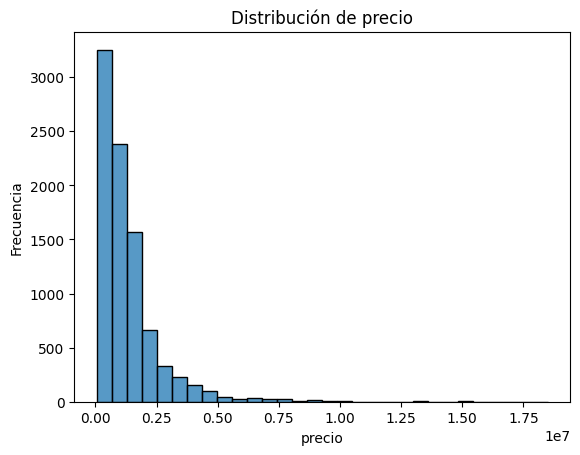

La media de precio es: 1334017.89
La minimo de precio es: 65000
La maximo de precio es: 18500000


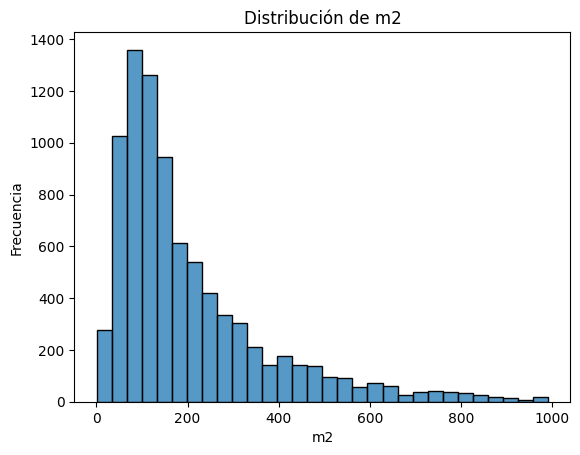

La media de m2 es: 201.78
La minimo de m2 es: 1
La maximo de m2 es: 991


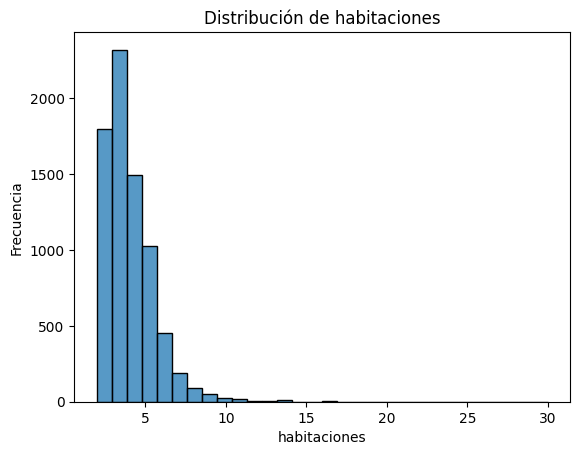

La media de habitaciones es: 3.68
La minimo de habitaciones es: 2
La maximo de habitaciones es: 30


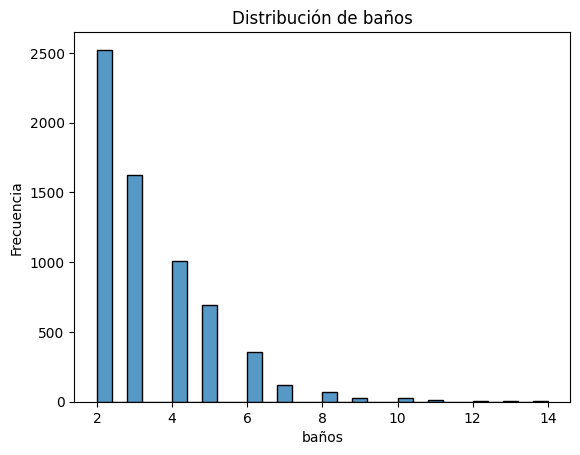

La media de baños es: 3.37
La minimo de baños es: 2
La maximo de baños es: 14


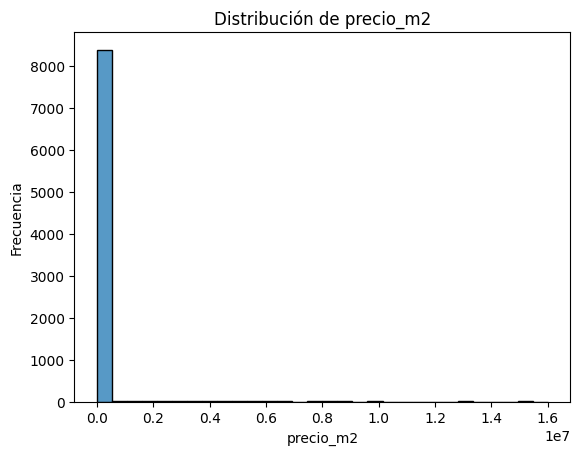

La media de precio_m2 es: 86482.0
La minimo de precio_m2 es: 259.8
La maximo de precio_m2 es: 16000000.0


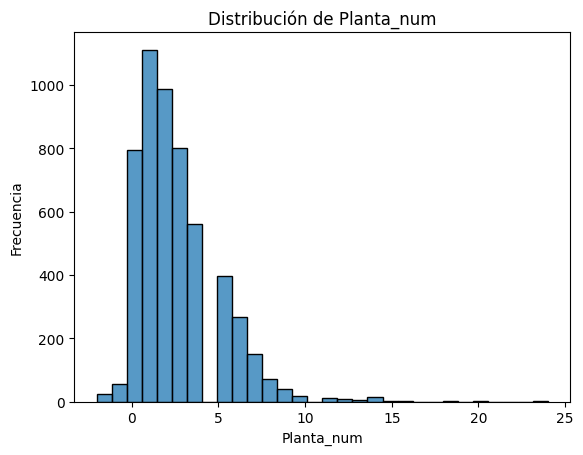

La media de Planta_num es: 2.63
La minimo de Planta_num es: -2.0
La maximo de Planta_num es: 24.0


In [36]:
for col in num_cols:
    plt.Figure(figsize=(10, 5))
    sns.histplot(datos_compra[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

    media_col = datos_compra[col].mean().__round__(2)
    print(f'La media de {col} es: {media_col}')
    
    min_col = datos_compra[col].min().__round__(2)
    print(f'La minimo de {col} es: {min_col}')

    maximo_col = datos_compra[col].max().__round__(2)
    print(f'La maximo de {col} es: {maximo_col}')

In [37]:
datos_compra.describe(include="object").T

,count,unique,top,freq
estado,7833,2,Segunda mano/buen estado,6725
barrio,6683,72,Distrito de Salamanca,1199
distrito,6917,90,Centro,1204
ciudad,8901,3,Madrid capital,5721
Ascensor,5422,2,Si,4567
EXT-INT,5406,2,Exterior,4582
vivienda,8901,8,Piso,5621
tipo_vivienda,8901,2,Piso,6781


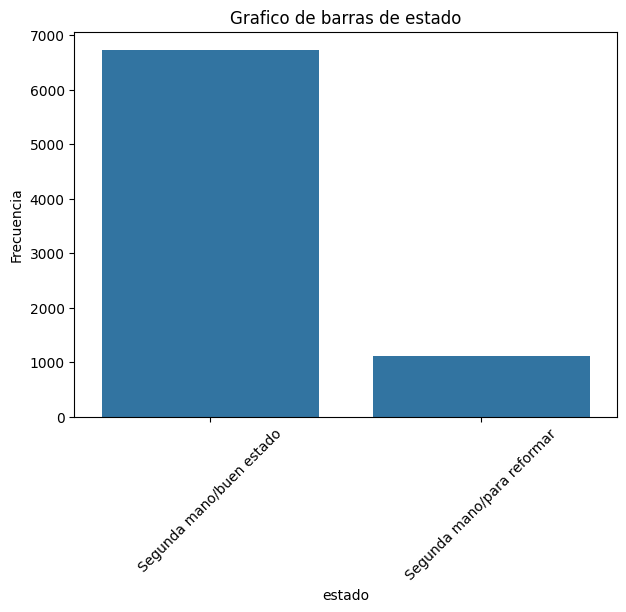

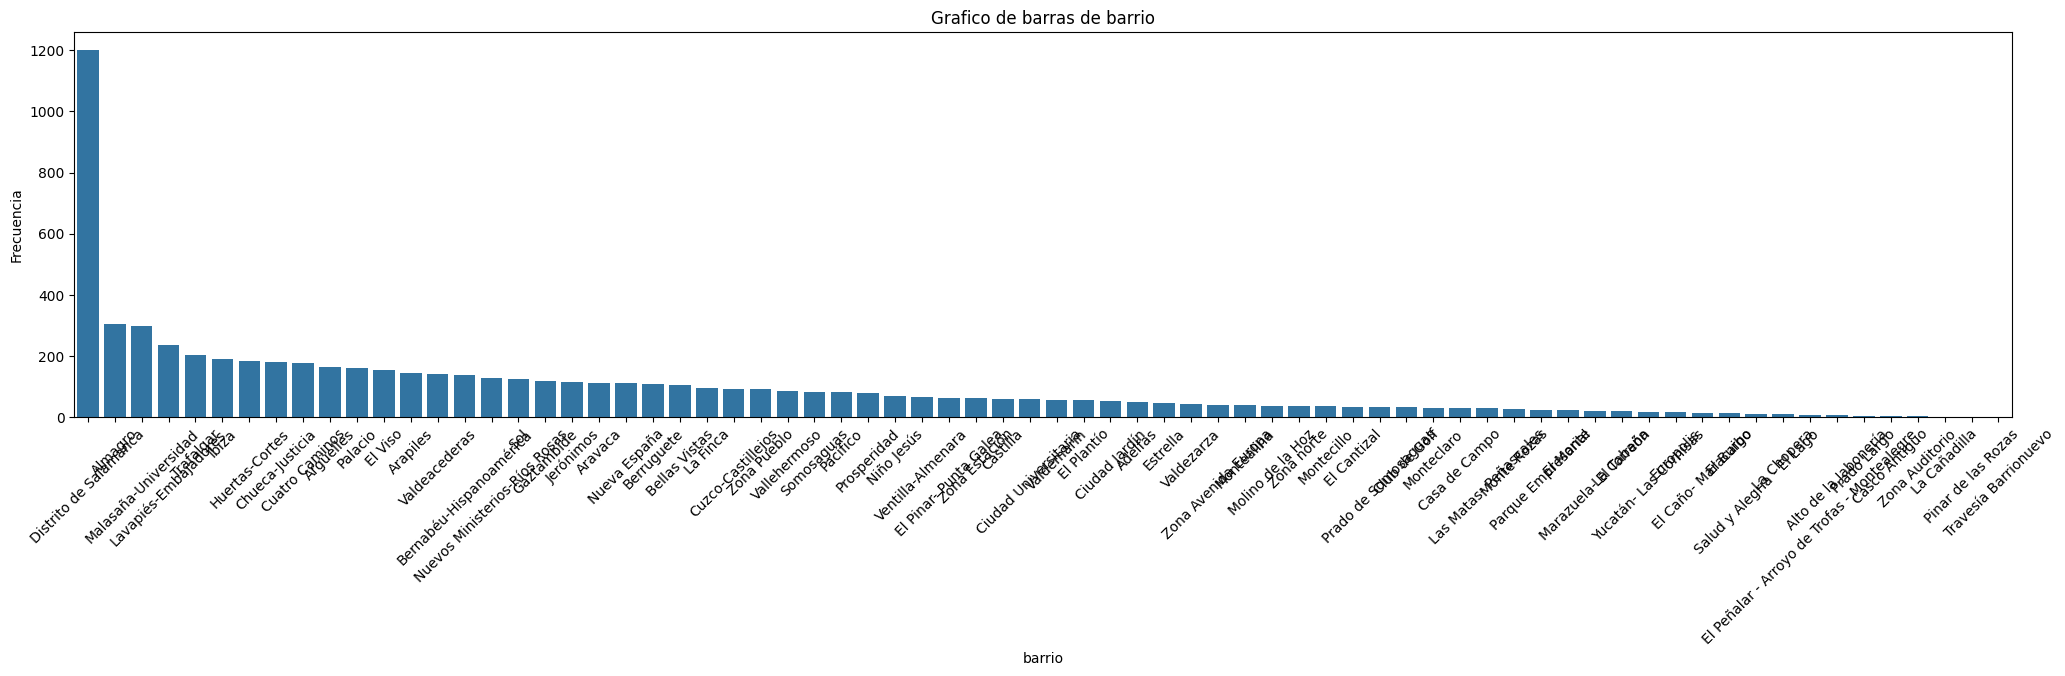

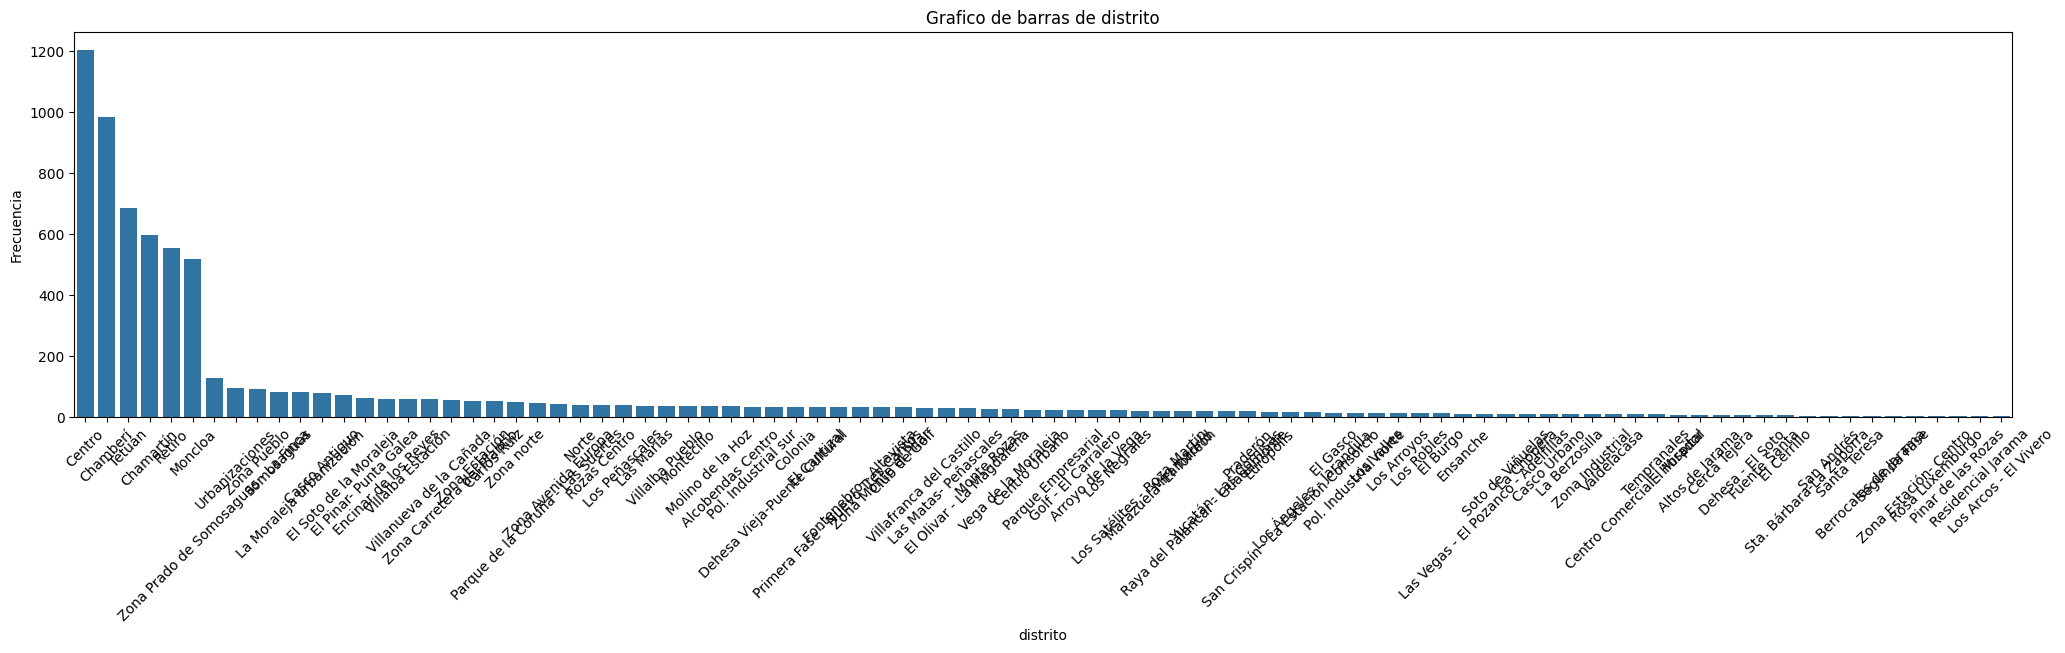

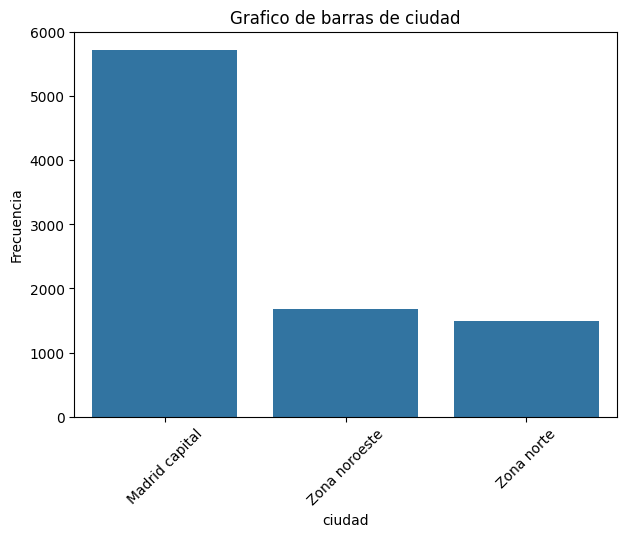

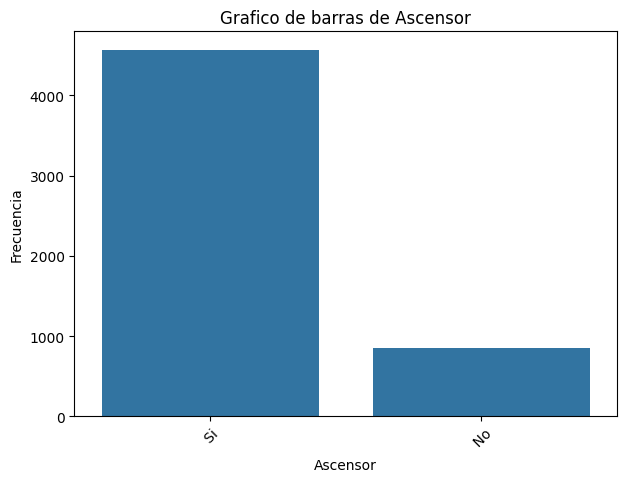

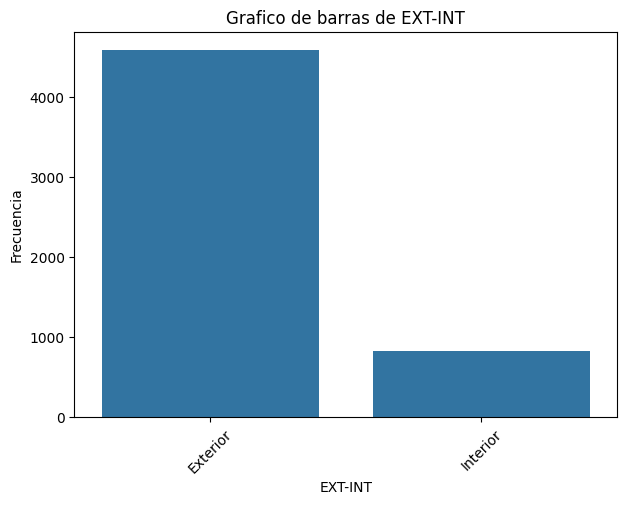

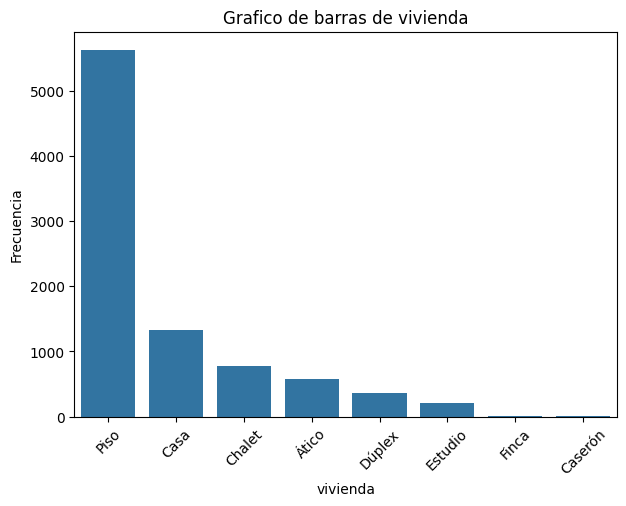

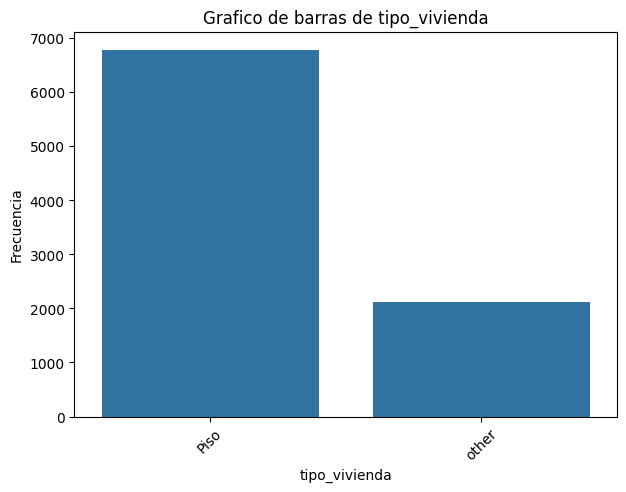

In [38]:
for col in cat_cols:
    num_categories = datos_compra[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5

    plt.figure(figsize=(width, height))
    sns.countplot(x=datos_compra[col], order=datos_compra[col].value_counts().index)

    plt.title(f'Grafico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()

In [39]:
datos_compra.head(10)

,precio,m2,habitaciones,baños,estado,armarios_empotrados,aire_acondicionado,barrio,distrito,ciudad,Ascensor,EXT-INT,vivienda,precio_m2,tipo_vivienda,Planta_num
0,1690000,145,2,2,Segunda mano/buen estado,True,True,Sol,Centro,Madrid capital,NaN,NaN,Piso,11655.17,Piso,NaN
1,895000,106,2,<NA>,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Ático,8443.4,Piso,4.0
2,1495000,164,3,3,Segunda mano/buen estado,False,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,9115.85,Piso,2.0
3,723000,123,5,2,Segunda mano/buen estado,True,True,Lavapiés-Embajadores,Centro,Madrid capital,No,Exterior,Piso,5878.05,Piso,2.0
4,2450000,166,2,2,Segunda mano/buen estado,True,True,Chueca-Justicia,Centro,Madrid capital,Si,Exterior,Piso,14759.04,Piso,2.0
5,750000,114,2,2,Segunda mano/buen estado,False,False,Sol,Centro,Madrid capital,Si,Exterior,Piso,6578.95,Piso,2.0
6,2350000,218,4,4,Segunda mano/buen estado,False,True,Sol,Centro,Madrid capital,Si,Exterior,Piso,10779.82,Piso,5.0
7,1300000,102,3,3,Segunda mano/buen estado,False,False,Malasaña-Universidad,Centro,Madrid capital,No,Interior,Piso,12745.1,Piso,1.0
8,350000,56,2,<NA>,Segunda mano/buen estado,False,True,Lavapiés-Embajadores,Centro,Madrid capital,Si,Exterior,Piso,6250.0,Piso,2.0
9,1595000,188,3,2,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,8484.04,Piso,2.0


In [40]:
cols = ["estado", "Ascensor", "EXT-INT", "tipo_vivienda","armarios_empotrados", "aire_acondicionado" ]

datos_compra_c = pd.get_dummies(datos_compra, columns=cols, drop_first=True)

datos_compra_c.head()

,precio,m2,habitaciones,baños,barrio,distrito,ciudad,vivienda,precio_m2,Planta_num,estado_Segunda mano/para reformar,Ascensor_ Si,EXT-INT_Interior,tipo_vivienda_other,armarios_empotrados_True,aire_acondicionado_True
0,1690000,145,2,2,Sol,Centro,Madrid capital,Piso,11655.17,NaN,False,False,False,False,True,True
1,895000,106,2,<NA>,Palacio,Centro,Madrid capital,Ático,8443.4,4.0,False,True,False,False,True,True
2,1495000,164,3,3,Palacio,Centro,Madrid capital,Piso,9115.85,2.0,False,True,False,False,False,True
3,723000,123,5,2,Lavapiés-Embajadores,Centro,Madrid capital,Piso,5878.05,2.0,False,False,False,False,True,True
4,2450000,166,2,2,Chueca-Justicia,Centro,Madrid capital,Piso,14759.04,2.0,False,True,False,False,True,True


# Correlcion


In [41]:
datos_piso_p = datos_compra[(datos_compra["tipo_vivienda"] == "Piso") & (datos_compra["ciudad"] == "Madrid capital")]

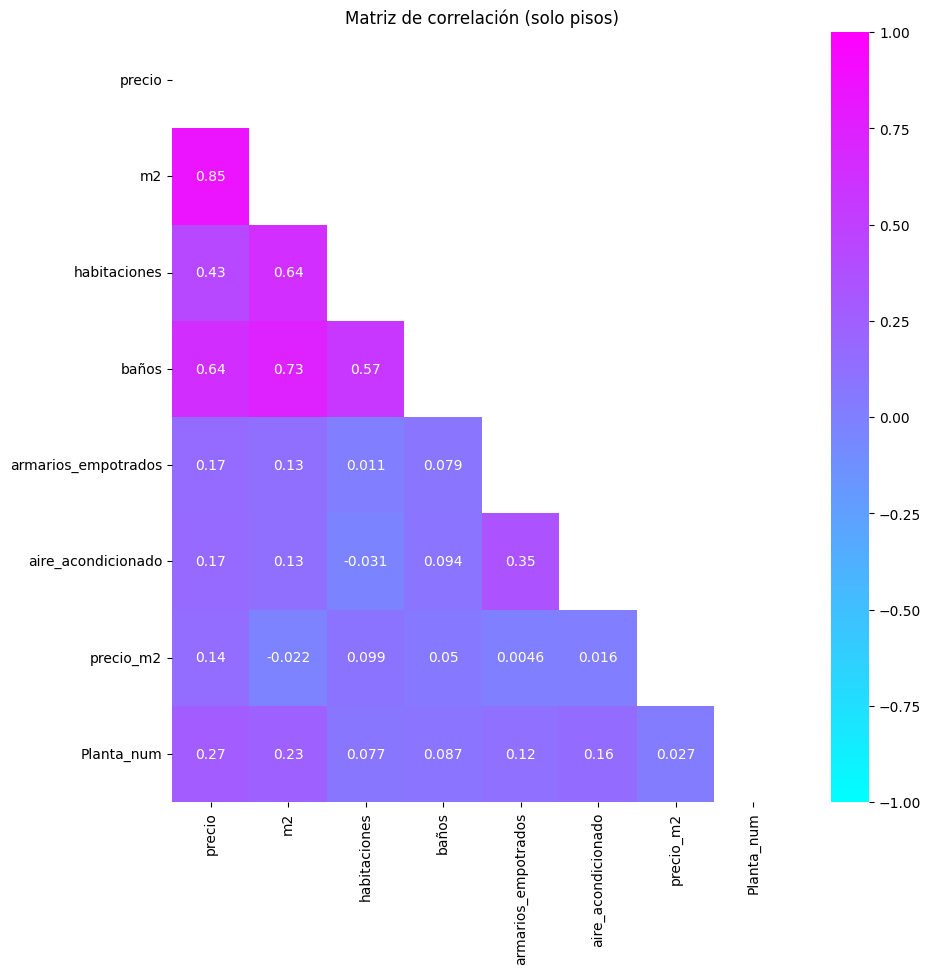

In [42]:

corr_matrix = datos_piso_p.corr(numeric_only=True)

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, mask=mask, cmap='cool')
plt.title("Matriz de correlación (solo pisos)")
plt.show()

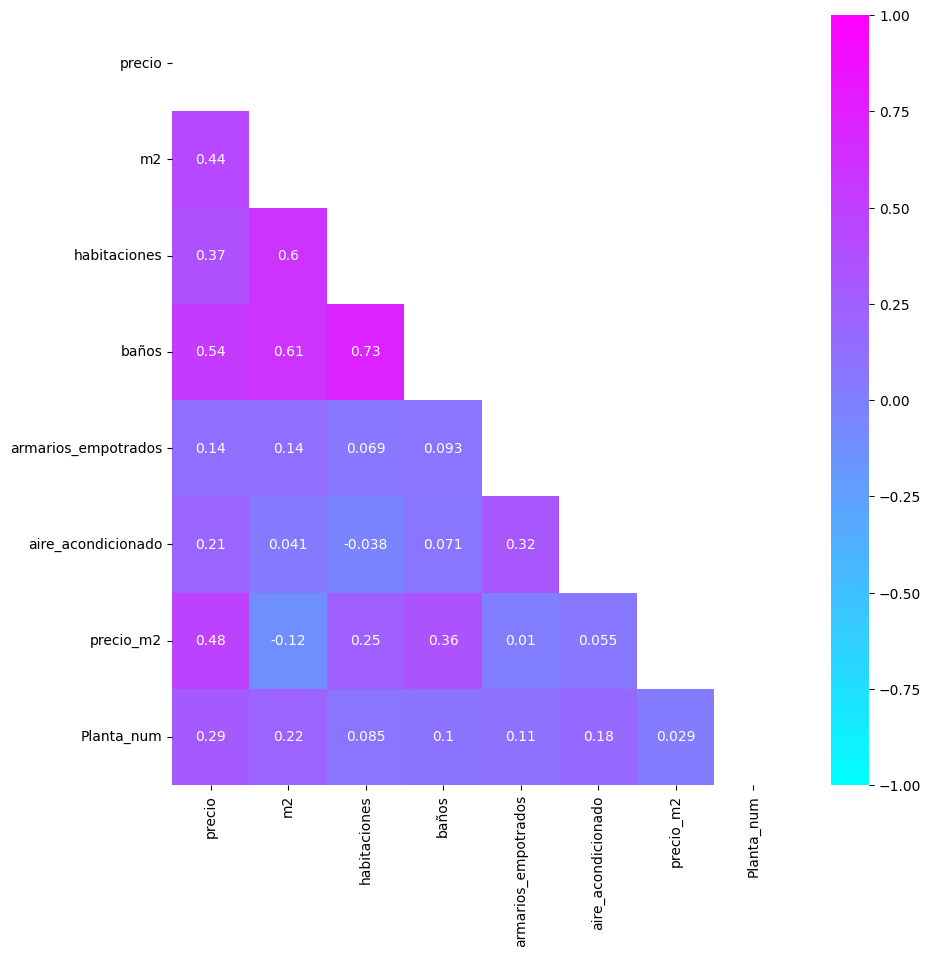

In [43]:
corr_matrix = datos_compra.corr(numeric_only=True)

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, mask=mask, cmap='cool')

plt.show()

In [44]:
le = LabelEncoder()
datos_compra["barrio_encoded"] = le.fit_transform(datos_compra["barrio"])

datos_compra[["barrio", "barrio_encoded"]].head(5)

,barrio,barrio_encoded
0,Sol,57
1,Palacio,50
2,Palacio,50
3,Lavapiés-Embajadores,38
4,Chueca-Justicia,12


cols = ["estado", "Ascensor", "EXT-INT", "tipo_vivienda","armarios_empotrados", "aire_acondicionado" ]

datos_compra_c = pd.get_dummies(datos_compra, columns=cols, drop_first=True)

datos_compra_c.head(5)

In [45]:
le = LabelEncoder()
datos_compra["estado_encoded"] = le.fit_transform(datos_compra["estado"])

datos_compra[["estado", "estado_encoded"]].head(5)

,estado,estado_encoded
0,Segunda mano/buen estado,0
1,Segunda mano/buen estado,0
2,Segunda mano/buen estado,0
3,Segunda mano/buen estado,0
4,Segunda mano/buen estado,0


In [46]:
le = LabelEncoder()
datos_compra["EXT-INT_encoded"] = le.fit_transform(datos_compra["EXT-INT"])

datos_compra[["EXT-INT", "EXT-INT_encoded"]].head(5)

,EXT-INT,EXT-INT_encoded
0,NaN,2
1,Exterior,0
2,Exterior,0
3,Exterior,0
4,Exterior,0


In [47]:
le = LabelEncoder()
datos_compra["Ascensor_encoded"] = le.fit_transform(datos_compra["Ascensor"])

datos_compra[["Ascensor", "Ascensor_encoded"]].head(5)


,Ascensor,Ascensor_encoded
0,NaN,2
1,Si,1
2,Si,1
3,No,0
4,Si,1


In [48]:
le = LabelEncoder()
datos_compra["estado_encoded"] = le.fit_transform(datos_compra["estado"])

datos_compra[["estado", "estado_encoded"]].head(5)

,estado,estado_encoded
0,Segunda mano/buen estado,0
1,Segunda mano/buen estado,0
2,Segunda mano/buen estado,0
3,Segunda mano/buen estado,0
4,Segunda mano/buen estado,0


In [49]:
datos_compra.head(5)

,precio,m2,habitaciones,baños,estado,armarios_empotrados,aire_acondicionado,barrio,distrito,ciudad,Ascensor,EXT-INT,vivienda,precio_m2,tipo_vivienda,Planta_num,barrio_encoded,estado_encoded,EXT-INT_encoded,Ascensor_encoded
0,1690000,145,2,2,Segunda mano/buen estado,True,True,Sol,Centro,Madrid capital,NaN,NaN,Piso,11655.17,Piso,NaN,57,0,2,2
1,895000,106,2,<NA>,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Ático,8443.4,Piso,4.0,50,0,0,1
2,1495000,164,3,3,Segunda mano/buen estado,False,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,9115.85,Piso,2.0,50,0,0,1
3,723000,123,5,2,Segunda mano/buen estado,True,True,Lavapiés-Embajadores,Centro,Madrid capital,No,Exterior,Piso,5878.05,Piso,2.0,38,0,0,0
4,2450000,166,2,2,Segunda mano/buen estado,True,True,Chueca-Justicia,Centro,Madrid capital,Si,Exterior,Piso,14759.04,Piso,2.0,12,0,0,1


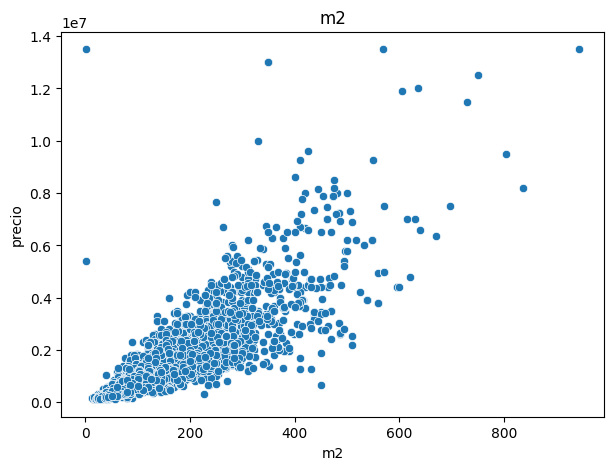

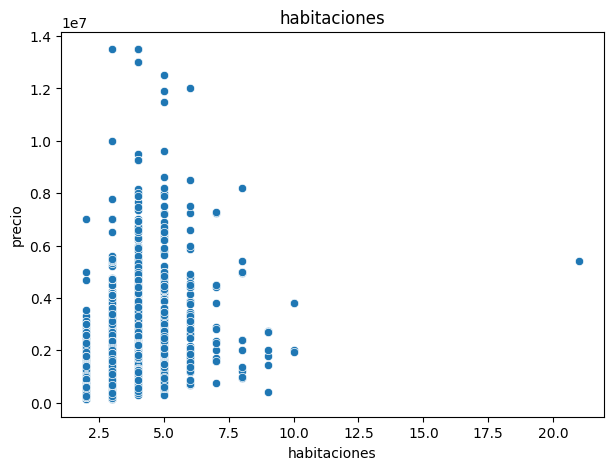

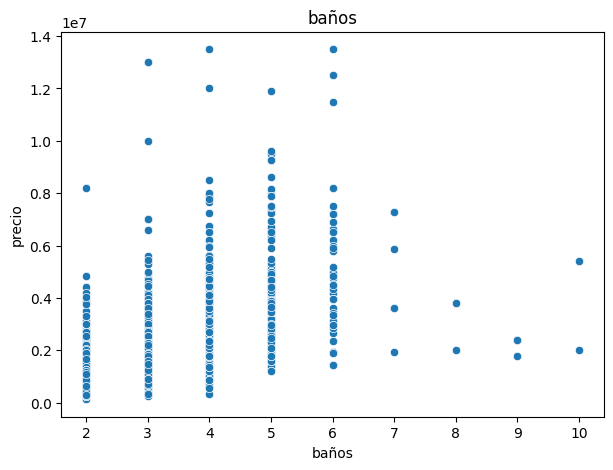

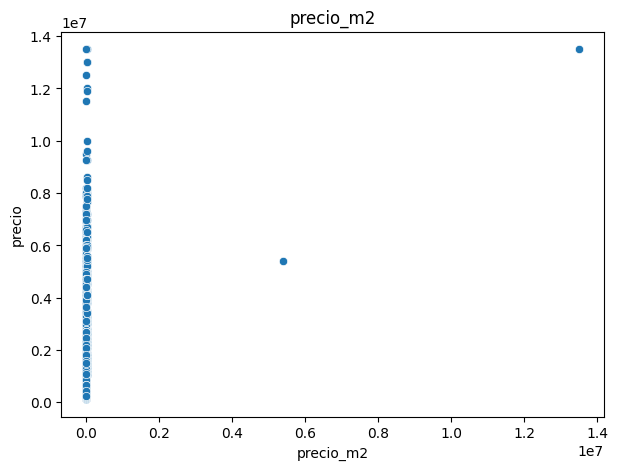

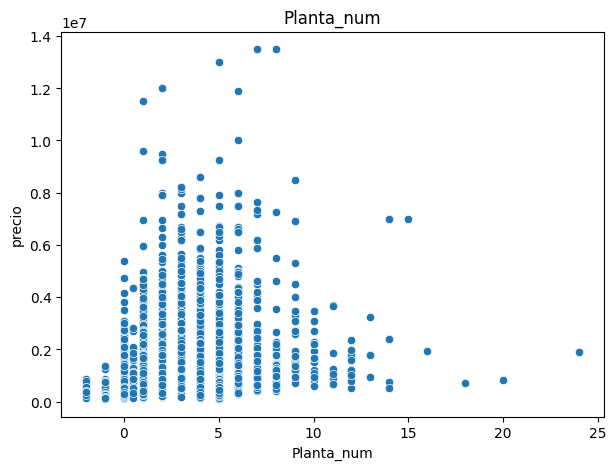

In [50]:
tv = 'precio'

datos_num = datos_piso_p.select_dtypes(include=np.number).drop(columns=[tv], errors='ignore')
cols_num= datos_num.columns

for col in cols_num:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=datos_piso_p[col], y=datos_piso_p[tv])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()

In [51]:
datos_compra.columns

Index(['precio', 'm2', 'habitaciones', 'baños', 'estado',
       'armarios_empotrados', 'aire_acondicionado', 'barrio', 'distrito',
       'ciudad', 'Ascensor', 'EXT-INT', 'vivienda', 'precio_m2',
       'tipo_vivienda', 'Planta_num', 'barrio_encoded', 'estado_encoded',
       'EXT-INT_encoded', 'Ascensor_encoded'],
      dtype='object')

In [52]:
tv = 'precio'

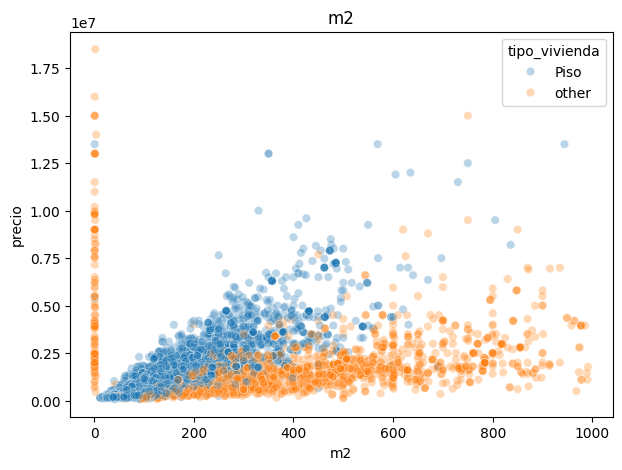

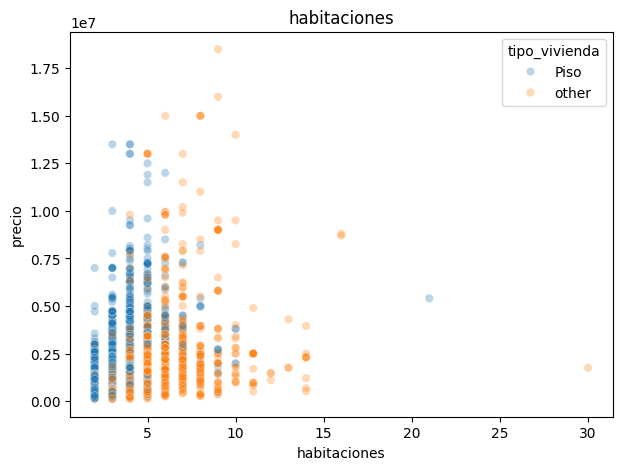

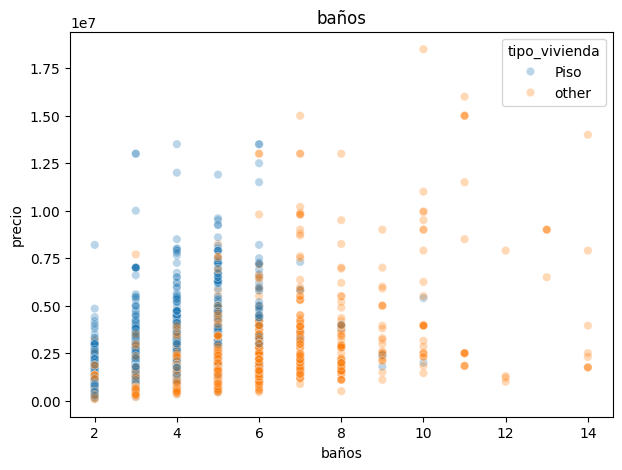

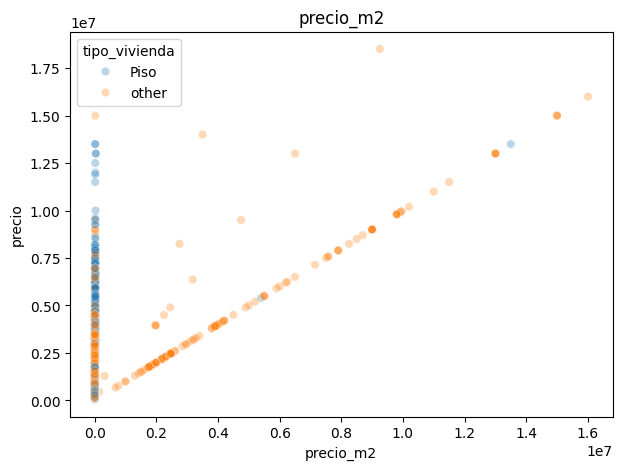

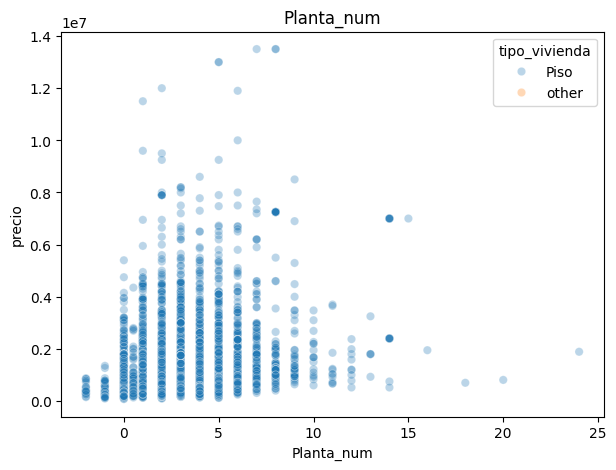

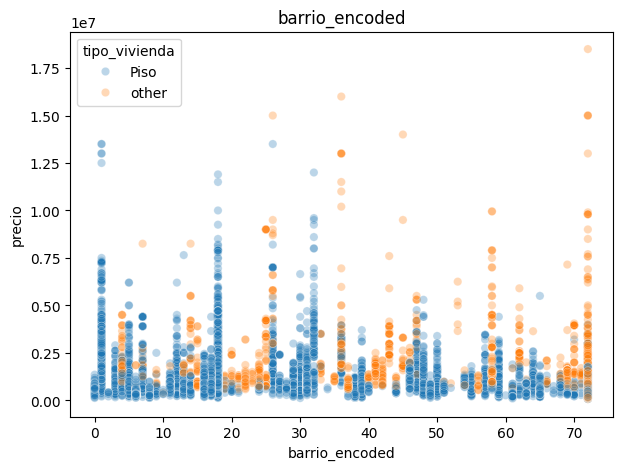

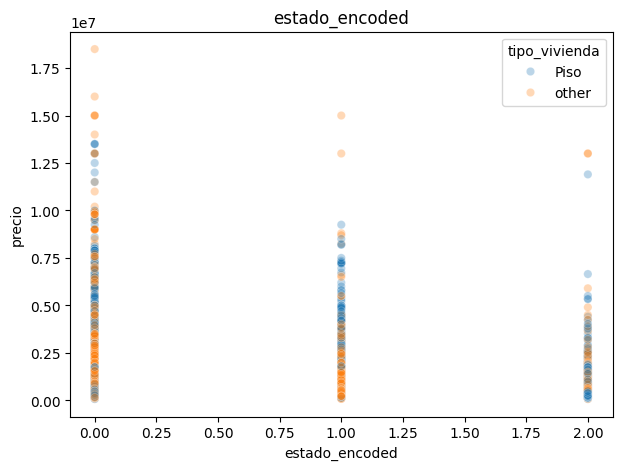

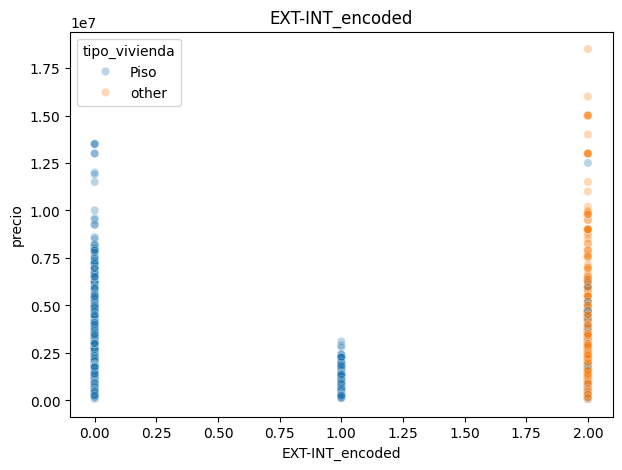

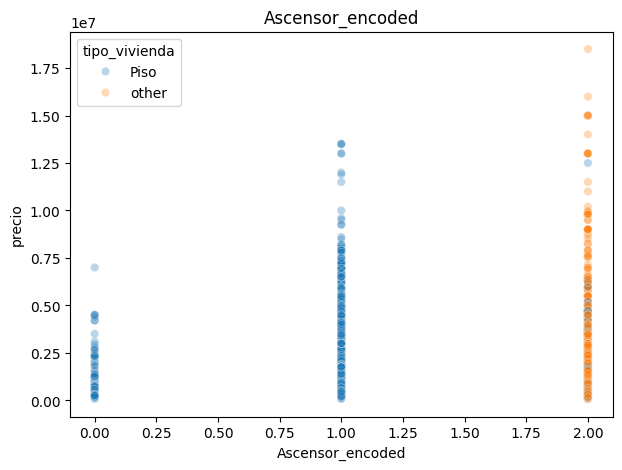

In [53]:


datos_num = datos_compra.select_dtypes(include=np.number).drop(columns=[tv], errors='ignore')
cols_num= datos_num.columns

for col in cols_num:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=datos_compra[col], y=datos_compra[tv], hue=datos_compra["tipo_vivienda"], alpha=0.3)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()

In [54]:
datos_piso_p_1 = datos_piso_p.drop(columns=['barrio', 'distrito'])
datos_piso_p_2 = datos_piso_p[['barrio', 'distrito',  'precio_m2']]

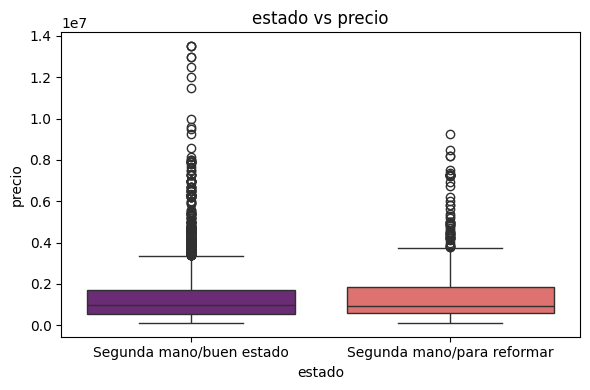


Mediana de precio según estado:
 estado
Segunda mano/buen estado      990000.0
Segunda mano/para reformar    925000.0
Name: precio, dtype: float64


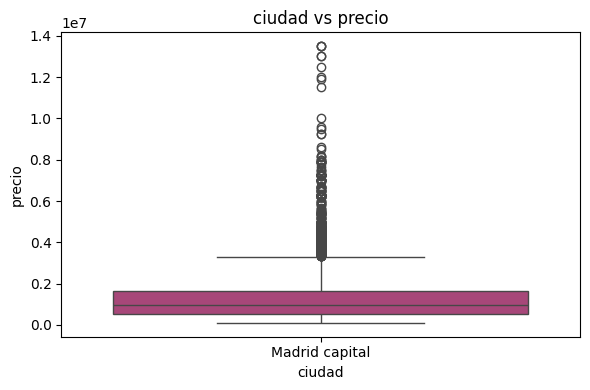


Mediana de precio según ciudad:
 ciudad
Madrid capital    950000.0
Name: precio, dtype: float64


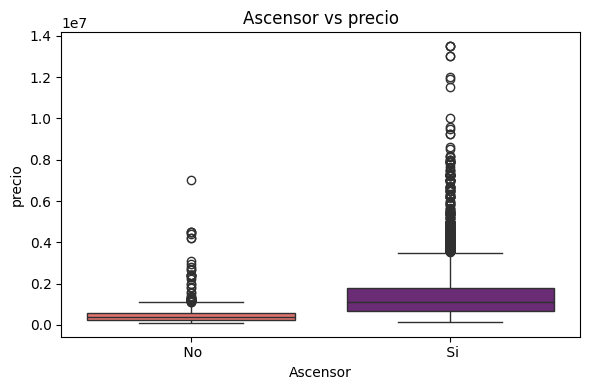


Mediana de precio según Ascensor:
 Ascensor
No     375000.0
Si    1100000.0
Name: precio, dtype: float64


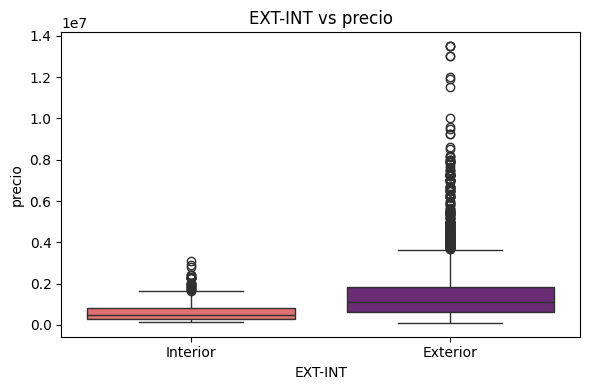


Mediana de precio según EXT-INT:
 EXT-INT
Exterior    1120000.0
Interior     475000.0
Name: precio, dtype: float64


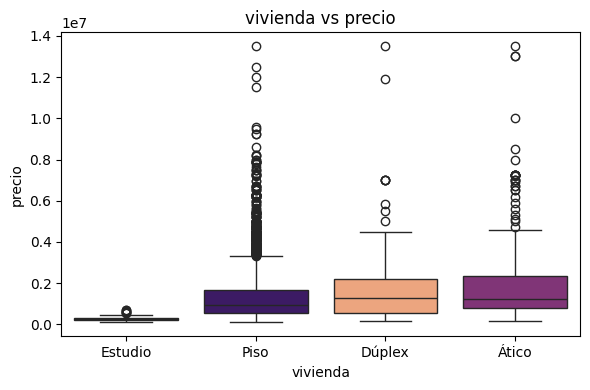


Mediana de precio según vivienda:
 vivienda
Dúplex     1292500.0
Estudio     260000.0
Piso        940000.0
Ático      1250000.0
Name: precio, dtype: float64


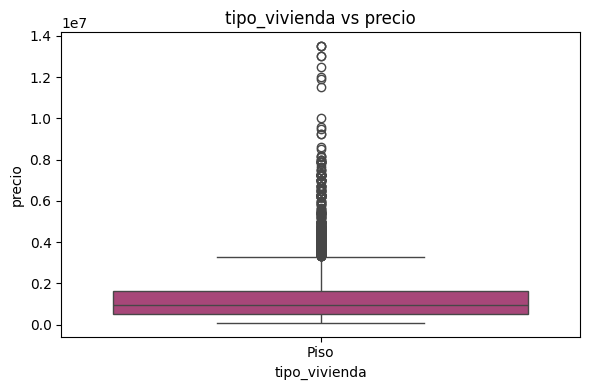


Mediana de precio según tipo_vivienda:
 tipo_vivienda
Piso    950000.0
Name: precio, dtype: float64


In [55]:
for col in cat_cols:
    if col not in datos_piso_p_1.columns:
        continue  # salta las que ya no existen
    
    num_cats = datos_piso_p_1[col].nunique()

    fig_width = min(max(6, num_cats * 1.5), 25)
    fig_height = 4

    ordered_cats = datos_piso_p_1.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=datos_piso_p_1[col], y=datos_piso_p_1[tv], hue=datos_piso_p[col], data=datos_piso_p_1, order=ordered_cats, palette="magma", legend=False)

    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.tight_layout()
    plt.show()

    mediana = datos_piso_p_1.groupby(col)[tv].median().round(2)
    print(f"\nMediana de {tv} según {col}:\n", mediana)

In [56]:
tv2 = 'precio_m2'

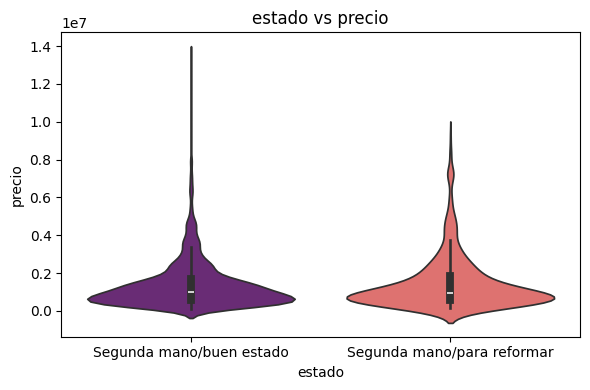


Mediana de precio según estado:
 estado
Segunda mano/buen estado      990000.0
Segunda mano/para reformar    925000.0
Name: precio, dtype: float64


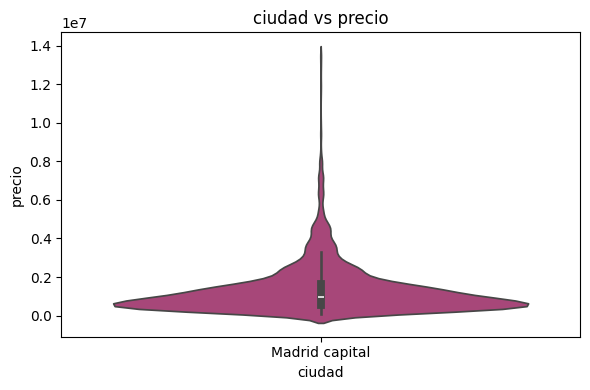


Mediana de precio según ciudad:
 ciudad
Madrid capital    950000.0
Name: precio, dtype: float64


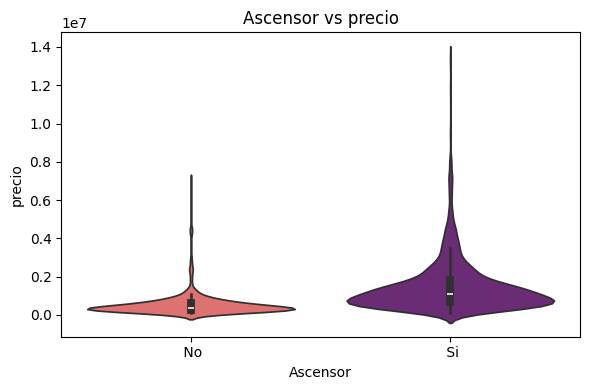


Mediana de precio según Ascensor:
 Ascensor
No     375000.0
Si    1100000.0
Name: precio, dtype: float64


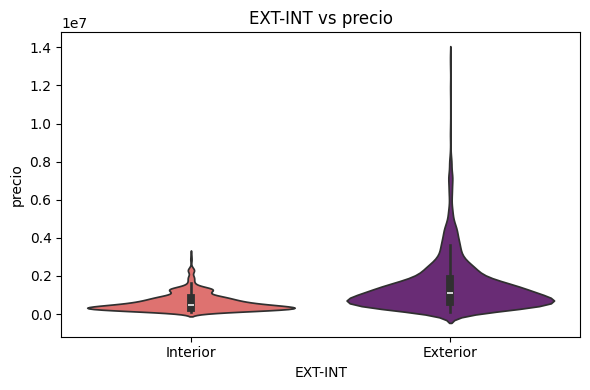


Mediana de precio según EXT-INT:
 EXT-INT
Exterior    1120000.0
Interior     475000.0
Name: precio, dtype: float64


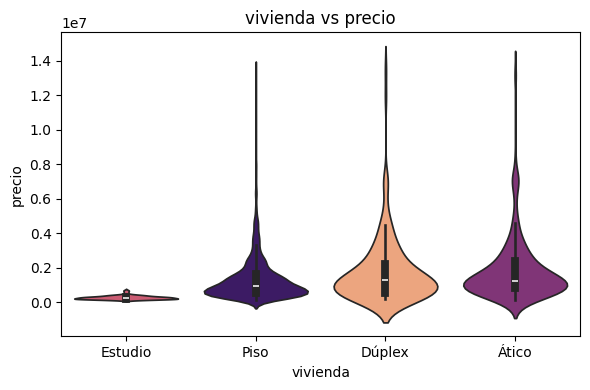


Mediana de precio según vivienda:
 vivienda
Dúplex     1292500.0
Estudio     260000.0
Piso        940000.0
Ático      1250000.0
Name: precio, dtype: float64


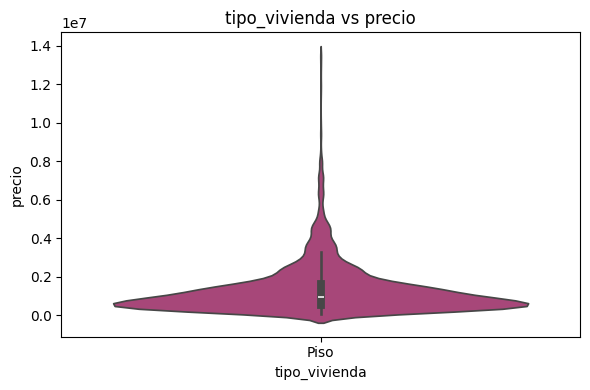


Mediana de precio según tipo_vivienda:
 tipo_vivienda
Piso    950000.0
Name: precio, dtype: float64


In [57]:
for col in cat_cols:
    if col not in datos_piso_p_1.columns:
        continue  # salta las que ya no existen
    
    num_cats = datos_piso_p_1[col].nunique()

    fig_width = min(max(6, num_cats * 1.5), 25)
    fig_height = 4

    ordered_cats = datos_piso_p_1.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(x=datos_piso_p_1[col], y=datos_piso_p_1[tv], hue=datos_piso_p[col], data=datos_piso_p_1, order=ordered_cats, palette="magma", legend=False)

    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.tight_layout()
    plt.show()

    mediana = datos_piso_p_1.groupby(col)[tv].median().round(2)
    print(f"\nMediana de {tv} según {col}:\n", mediana)

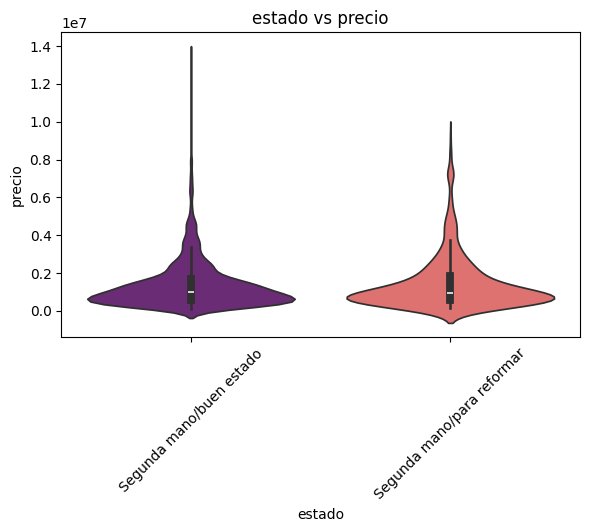


🔻 5 estado con medianas más bajas:
estado
Segunda mano/para reformar    925000.0
Segunda mano/buen estado      990000.0
Name: precio, dtype: float64

🔺 5 estado con medianas más altas:
estado
Segunda mano/para reformar    925000.0
Segunda mano/buen estado      990000.0
Name: precio, dtype: float64


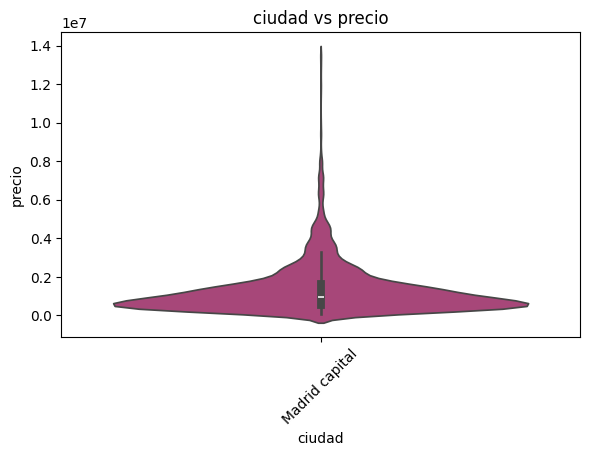


🔻 5 ciudad con medianas más bajas:
ciudad
Madrid capital    950000.0
Name: precio, dtype: float64

🔺 5 ciudad con medianas más altas:
ciudad
Madrid capital    950000.0
Name: precio, dtype: float64


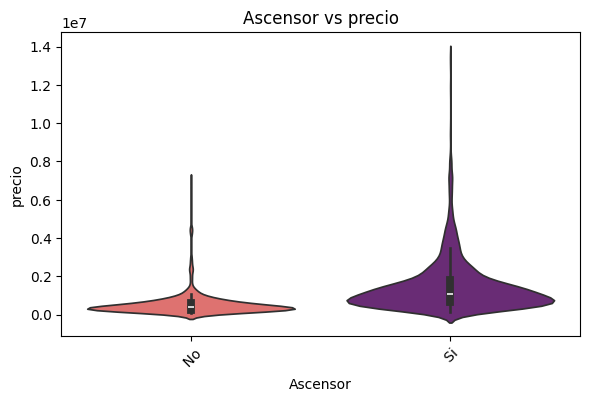


🔻 5 Ascensor con medianas más bajas:
Ascensor
No     375000.0
Si    1100000.0
Name: precio, dtype: float64

🔺 5 Ascensor con medianas más altas:
Ascensor
No     375000.0
Si    1100000.0
Name: precio, dtype: float64


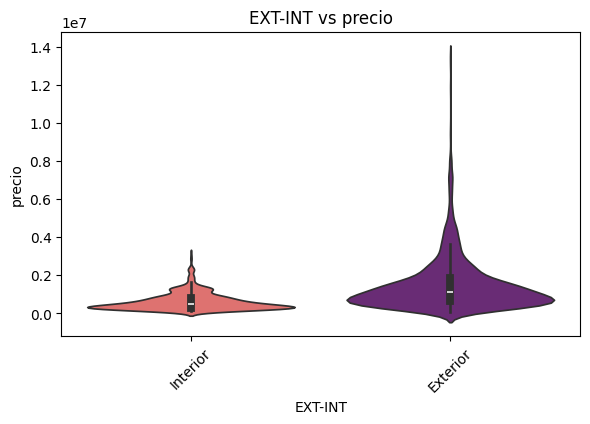


🔻 5 EXT-INT con medianas más bajas:
EXT-INT
Interior     475000.0
Exterior    1120000.0
Name: precio, dtype: float64

🔺 5 EXT-INT con medianas más altas:
EXT-INT
Interior     475000.0
Exterior    1120000.0
Name: precio, dtype: float64


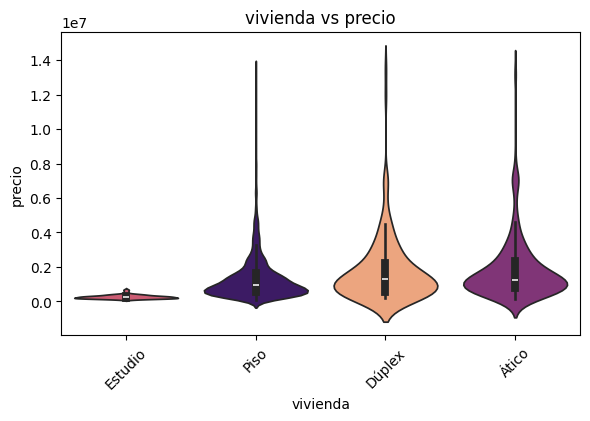


🔻 5 vivienda con medianas más bajas:
vivienda
Estudio     260000.0
Piso        940000.0
Ático      1250000.0
Dúplex     1292500.0
Name: precio, dtype: float64

🔺 5 vivienda con medianas más altas:
vivienda
Estudio     260000.0
Piso        940000.0
Ático      1250000.0
Dúplex     1292500.0
Name: precio, dtype: float64


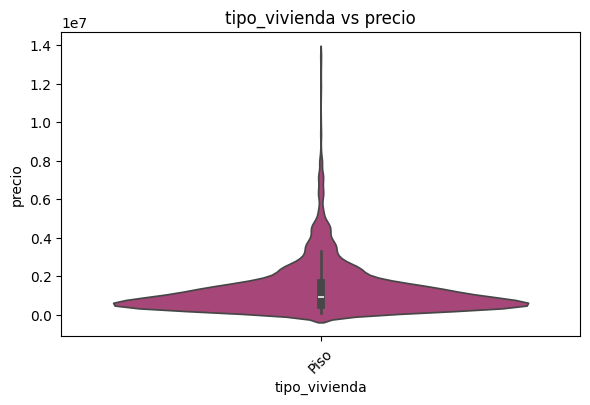


🔻 5 tipo_vivienda con medianas más bajas:
tipo_vivienda
Piso    950000.0
Name: precio, dtype: float64

🔺 5 tipo_vivienda con medianas más altas:
tipo_vivienda
Piso    950000.0
Name: precio, dtype: float64


In [58]:
for col in cat_cols:
    if col not in datos_piso_p_1.columns:
        continue  # salta las que ya no existen
    
    num_cats = datos_piso_p_1[col].nunique()

    fig_width = min(max(6, num_cats * 1), 25)
    fig_height = 4

    ordered_cats = datos_piso_p_1.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(x=datos_piso_p_1[col], y=datos_piso_p_1[tv], hue=datos_piso_p_1[col], data=datos_piso_p_1, order=ordered_cats, palette="magma", legend=False)

    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

    mediana = datos_piso_p_1.groupby(col)[tv].median().round(2)
    ordenados = mediana.sort_values()
    print(f"\n🔻 5 {col} con medianas más bajas:")
    print(ordenados.head(5))

    print(f"\n🔺 5 {col} con medianas más altas:")
    print(ordenados.tail(5))

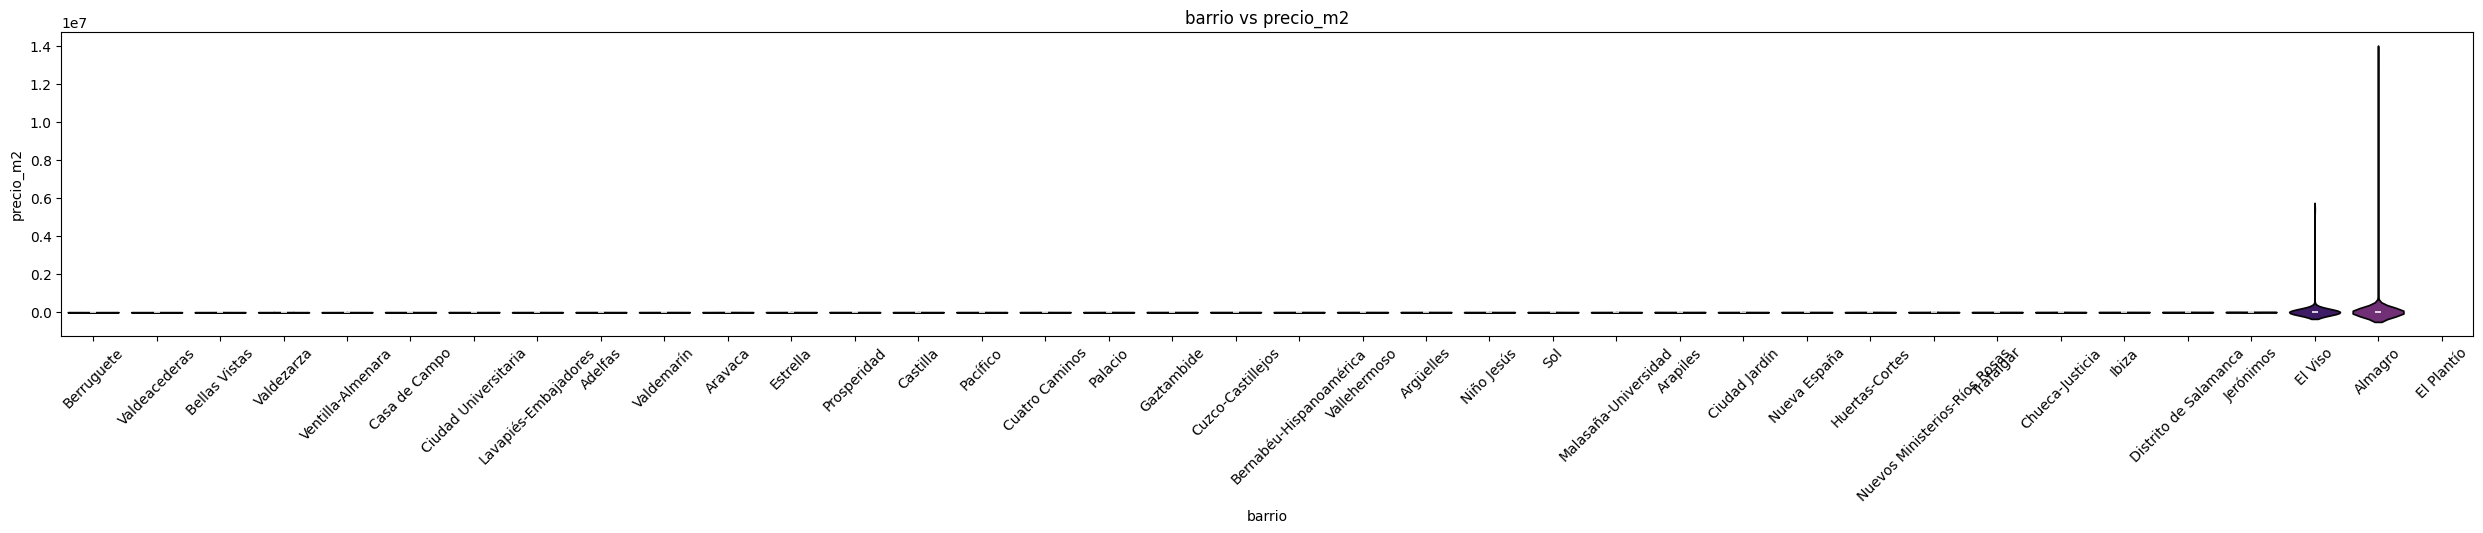


🔻 5 barrio con medianas más bajas:
barrio
Berruguete           5057.14
Ventilla-Almenara    5131.58
Valdeacederas        5227.27
Valdezarza           5301.09
Bellas Vistas        5548.13
Name: precio_m2, dtype: Float64

🔺 5 barrio con medianas más altas:
barrio
Ibiza                     9467.72
Distrito de Salamanca    11153.85
Almagro                  11658.54
Jerónimos                13419.91
El Plantío                   <NA>
Name: precio_m2, dtype: Float64


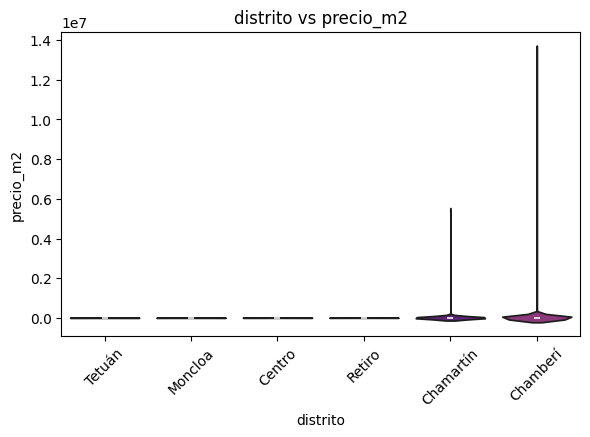


🔻 5 distrito con medianas más bajas:
distrito
Tetuán        5882.6
Moncloa      6923.08
Centro       7651.32
Chamartín    7789.61
Retiro       8685.18
Name: precio_m2, dtype: Float64

🔺 5 distrito con medianas más altas:
distrito
Moncloa      6923.08
Centro       7651.32
Chamartín    7789.61
Retiro       8685.18
Chamberí     9274.19
Name: precio_m2, dtype: Float64


In [59]:
for col in cat_cols:
    if col not in datos_piso_p_2.columns:
        continue  # salta las que ya no existen
    
    num_cats = datos_piso_p_2[col].nunique()

    fig_width = min(max(6, num_cats * 1), 25)
    fig_height = 4

    ordered_cats = datos_piso_p_2.groupby(col)[tv2].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(x=datos_piso_p_2[col], y=datos_piso_p_2[tv2], hue=datos_piso_p_2[col], data=datos_piso_p_2, order=ordered_cats, palette="magma", legend=False)

    plt.title(f"{col} vs {tv2}")
    plt.xlabel(col)
    plt.ylabel(tv2)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

    mediana = datos_piso_p_2.groupby(col)[tv2].median().round(2)
    ordenados = mediana.sort_values()
    print(f"\n🔻 5 {col} con medianas más bajas:")
    print(ordenados.head(5))

    print(f"\n🔺 5 {col} con medianas más altas:")
    print(ordenados.tail(5))

# Regresion
## Librerias


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [61]:
datos_compra_r.shape

(8901, 21)

In [62]:
datos_compra_r.head()

,id,titulo,localización,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,calle,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT
0,107264664,Piso en venta en calle Mayor,Sol,1690000,145.0,2.0,2.0,True,Segunda mano/buen estado,True,Norte,1900.0,Gas natural,True,Calle Mayor,Sol,Centro,"Madrid capital, Madrid",NaN,NaN,NaN
1,108324155,Ático en venta en calle de las Aguas,Palacio,895000,106.0,2.0,NaN,True,Segunda mano/buen estado,True,NaN,1940.0,Gas natural,True,Calle de las Aguas,Palacio,Centro,"Madrid capital, Madrid",4,Si,Exterior
2,105521069,Piso en venta en calle de Noblejas,Palacio,1495000,164.0,3.0,3.0,False,Segunda mano/buen estado,False,Norte,1989.0,NaN,True,Calle de Noblejas,Palacio,Centro,"Madrid capital, Madrid",2,Si,Exterior
3,106506235,Piso en venta en plaza de Lavapiés,Lavapiés-Embajadores,723000,123.0,5.0,2.0,False,Segunda mano/buen estado,True,Oeste,1900.0,Gas natural,True,Plaza de Lavapiés,Lavapiés-Embajadores,Centro,"Madrid capital, Madrid",2,No,Exterior
4,107684577,Piso en venta en calle de San Gregorio,Chueca-Justicia,2450000,166.0,2.0,2.0,False,Segunda mano/buen estado,True,Sur,1900.0,Eléctrica,True,Calle de San Gregorio,Chueca-Justicia,Centro,"Madrid capital, Madrid",2,Si,Exterior


In [63]:
datos_compra_r['vivienda'] = datos_compra_r['titulo'].apply(lambda x: str(x).split()[0] if pd.notnull(x) and len(str(x).split()) > 0 else None)

In [64]:
# Cambiar para cambiar información columnas

def clasificar_vivienda(vivienda):
    if vivienda in ['Piso', 'Ático', 'Estudio', 'Dúplex']:
        return 'Piso'
    elif vivienda == ['Casa' 'Chalet' 'Finca' 'Caserón']:
        return 'Casa'
    else:
        return 'other'  # O puedes usar 'desconocido' si prefieres

# Crear la nueva columna
datos_compra_r['tipo_vivienda'] = datos_compra_r['vivienda'].apply(clasificar_vivienda)

In [65]:
datos_compra_r['ciudad'] = datos_compra_r['ciudad'].str.split(",").str[0]

In [66]:
datos_compra_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8901 non-null   int64  
 1   titulo               8901 non-null   object 
 2   localización         8901 non-null   object 
 3   precio               8901 non-null   int64  
 4   superficie_m2        8518 non-null   float64
 5   habitaciones         7465 non-null   float64
 6   baños                6478 non-null   float64
 7   terraza              8901 non-null   bool   
 8   estado               7833 non-null   object 
 9   armarios_empotrados  8901 non-null   bool   
 10  orientacion          4735 non-null   object 
 11  año_construccion     4754 non-null   float64
 12  calefaccion          3921 non-null   object 
 13  aire_acondicionado   8901 non-null   bool   
 14  calle                4634 non-null   object 
 15  barrio               6683 non-null   o

In [67]:
datos_pisos_r = datos_compra_r[
    (datos_compra_r["tipo_vivienda"] == "Piso") &
    (datos_compra_r["ciudad"] == "Madrid capital")
]

In [68]:
datos_pisos_r.head(5)

,id,titulo,localización,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,calle,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda,tipo_vivienda
0,107264664,Piso en venta en calle Mayor,Sol,1690000,145.0,2.0,2.0,True,Segunda mano/buen estado,True,Norte,1900.0,Gas natural,True,Calle Mayor,Sol,Centro,Madrid capital,NaN,NaN,NaN,Piso,Piso
1,108324155,Ático en venta en calle de las Aguas,Palacio,895000,106.0,2.0,NaN,True,Segunda mano/buen estado,True,NaN,1940.0,Gas natural,True,Calle de las Aguas,Palacio,Centro,Madrid capital,4,Si,Exterior,Ático,Piso
2,105521069,Piso en venta en calle de Noblejas,Palacio,1495000,164.0,3.0,3.0,False,Segunda mano/buen estado,False,Norte,1989.0,NaN,True,Calle de Noblejas,Palacio,Centro,Madrid capital,2,Si,Exterior,Piso,Piso
3,106506235,Piso en venta en plaza de Lavapiés,Lavapiés-Embajadores,723000,123.0,5.0,2.0,False,Segunda mano/buen estado,True,Oeste,1900.0,Gas natural,True,Plaza de Lavapiés,Lavapiés-Embajadores,Centro,Madrid capital,2,No,Exterior,Piso,Piso
4,107684577,Piso en venta en calle de San Gregorio,Chueca-Justicia,2450000,166.0,2.0,2.0,False,Segunda mano/buen estado,True,Sur,1900.0,Eléctrica,True,Calle de San Gregorio,Chueca-Justicia,Centro,Madrid capital,2,Si,Exterior,Piso,Piso


In [69]:
datos_pisos_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5461 entries, 0 to 6843
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5461 non-null   int64  
 1   titulo               5461 non-null   object 
 2   localización         5461 non-null   object 
 3   precio               5461 non-null   int64  
 4   superficie_m2        5209 non-null   float64
 5   habitaciones         4355 non-null   float64
 6   baños                3636 non-null   float64
 7   terraza              5461 non-null   bool   
 8   estado               5030 non-null   object 
 9   armarios_empotrados  5461 non-null   bool   
 10  orientacion          2936 non-null   object 
 11  año_construccion     2922 non-null   float64
 12  calefaccion          2494 non-null   object 
 13  aire_acondicionado   5461 non-null   bool   
 14  calle                3250 non-null   object 
 15  barrio               5461 non-null   object

In [70]:
datos_pisos_r.isnull().sum()

id                        0
titulo                    0
localización              0
precio                    0
superficie_m2           252
habitaciones           1106
baños                  1825
terraza                   0
estado                  431
armarios_empotrados       0
orientacion            2525
año_construccion       2539
calefaccion            2967
aire_acondicionado        0
calle                  2211
barrio                    0
distrito               1183
ciudad                    0
Planta                 1061
Ascensor                993
EXT-INT                1001
vivienda                  0
tipo_vivienda             0
dtype: int64

In [71]:
datos_pisos_r['localización'].unique()

array(['Sol', 'Palacio', 'Lavapiés-Embajadores', 'Chueca-Justicia',
       'Malasaña-Universidad', 'Centro', 'Huertas-Cortes', 'Nueva España',
       'Chamartín', 'Bernabéu-Hispanoamérica', 'El Viso', 'Prosperidad',
       'Castilla', 'Ciudad Jardín', 'Gaztambide', 'Almagro',
       'Nuevos Ministerios-Ríos Rosas', 'Trafalgar', 'Arapiles',
       'Chamberí', 'Vallehermoso', 'Aravaca', 'Argüelles', 'Moncloa',
       'Valdemarín', 'Ciudad Universitaria', 'Valdezarza',
       'Casa de Campo', 'El Plantío', 'Adelfas', 'Retiro', 'Jerónimos',
       'Ibiza', 'Pacífico', 'Niño Jesús', 'Estrella', 'Castellana',
       'Goya', 'Lista', 'Recoletos', 'Barrio de Salamanca',
       'Fuente del Berro', 'Guindalera', 'Cuzco-Castillejos',
       'Cuatro Caminos', 'Tetuán', 'Bellas Vistas', 'Ventilla-Almenara',
       'Berruguete', 'Valdeacederas'], dtype=object)

In [72]:
mapa = {
    "Entreplanta": 0.5,
    "Sótano": -2,
    "Semi-sótano": -1,
    "Bajo": 0,
}

def clasificar_planta(planta):
    if pd.isna(planta):  # Si es NaN
        return np.nan
    planta = str(planta).strip()  # limpiar espacios

    # Si está en el mapa -> asignar
    if planta in mapa:
        return mapa[planta]

    # Si es un número válido -> devolver como número
    if planta.lstrip("-").isdigit():
        return int(planta)

    # Si es algo no reconocible -> NaN
    return np.nan

# Aplicar
datos_pisos_r["Planta_num"] = datos_pisos_r["Planta"].apply(clasificar_planta)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\1784010999.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["Planta_num"] = datos_pisos_r["Planta"].apply(clasificar_planta)


In [73]:
porcentaje_nulos_r = (datos_pisos_r.isnull().sum() / len(datos_pisos_r)) * 100
porcentaje_nulos_r = porcentaje_nulos_r.round(2).astype(str) + ' %'

# Mostrar los porcentajes con dos decimales
print(porcentaje_nulos_r)

id                       0.0 %
titulo                   0.0 %
localización             0.0 %
precio                   0.0 %
superficie_m2           4.61 %
habitaciones           20.25 %
baños                  33.42 %
terraza                  0.0 %
estado                  7.89 %
armarios_empotrados      0.0 %
orientacion            46.24 %
año_construccion       46.49 %
calefaccion            54.33 %
aire_acondicionado       0.0 %
calle                  40.49 %
barrio                   0.0 %
distrito               21.66 %
ciudad                   0.0 %
Planta                 19.43 %
Ascensor               18.18 %
EXT-INT                18.33 %
vivienda                 0.0 %
tipo_vivienda            0.0 %
Planta_num             19.56 %
dtype: object


In [74]:
datos_pisos_r.head(3)

,id,titulo,localización,precio,superficie_m2,habitaciones,baños,terraza,estado,armarios_empotrados,orientacion,año_construccion,calefaccion,aire_acondicionado,calle,barrio,distrito,ciudad,Planta,Ascensor,EXT-INT,vivienda,tipo_vivienda,Planta_num
0,107264664,Piso en venta en calle Mayor,Sol,1690000,145.0,2.0,2.0,True,Segunda mano/buen estado,True,Norte,1900.0,Gas natural,True,Calle Mayor,Sol,Centro,Madrid capital,NaN,NaN,NaN,Piso,Piso,NaN
1,108324155,Ático en venta en calle de las Aguas,Palacio,895000,106.0,2.0,NaN,True,Segunda mano/buen estado,True,NaN,1940.0,Gas natural,True,Calle de las Aguas,Palacio,Centro,Madrid capital,4,Si,Exterior,Ático,Piso,4.0
2,105521069,Piso en venta en calle de Noblejas,Palacio,1495000,164.0,3.0,3.0,False,Segunda mano/buen estado,False,Norte,1989.0,NaN,True,Calle de Noblejas,Palacio,Centro,Madrid capital,2,Si,Exterior,Piso,Piso,2.0


In [75]:
datos_pisos_r.drop(columns=['titulo','Planta', 'id', 'localización', 'año_construccion', 'calefaccion','calle'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\612648507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r.drop(columns=['titulo','Planta', 'id', 'localización', 'año_construccion', 'calefaccion','calle'], inplace=True)


In [76]:
datos_pisos_r.drop(columns=['orientacion'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\1589882795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r.drop(columns=['orientacion'], inplace=True)


In [77]:
datos_pisos_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5461 entries, 0 to 6843
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               5461 non-null   int64  
 1   superficie_m2        5209 non-null   float64
 2   habitaciones         4355 non-null   float64
 3   baños                3636 non-null   float64
 4   terraza              5461 non-null   bool   
 5   estado               5030 non-null   object 
 6   armarios_empotrados  5461 non-null   bool   
 7   aire_acondicionado   5461 non-null   bool   
 8   barrio               5461 non-null   object 
 9   distrito             4278 non-null   object 
 10  ciudad               5461 non-null   object 
 11  Ascensor             4468 non-null   object 
 12  EXT-INT              4460 non-null   object 
 13  vivienda             5461 non-null   object 
 14  tipo_vivienda        5461 non-null   object 
 15  Planta_num           4393 non-null   float6

In [78]:
datos_pisos_r['habitaciones'] = datos_pisos_r['habitaciones'].astype('Int64')
datos_pisos_r['baños'] = datos_pisos_r['baños'].astype('Int64')
datos_pisos_r['superficie_m2'] = datos_pisos_r['superficie_m2'].astype('Int64')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3772072905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r['habitaciones'] = datos_pisos_r['habitaciones'].astype('Int64')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3772072905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r['baños'] = datos_pisos_r['baños'].astype('Int64')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3772072905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [79]:
print(datos_pisos_r["Planta_num"].unique()[:20])

[ nan  4.   2.   5.   1.   3.   0.   6.   0.5 10.  11.   7.  -2.  -1.
  8.   9.  14.  13.  12.  15. ]


In [80]:
num_cols = datos_pisos_r.select_dtypes(include=np.number).columns
print(" Las varaibles numeriacas: \n\n", num_cols)


 Las varaibles numeriacas: 

 Index(['precio', 'superficie_m2', 'habitaciones', 'baños', 'Planta_num'], dtype='object')


In [81]:
cat_cols = datos_compra.select_dtypes(include=['object', 'category']).columns
print(" Las varaibles numeriacas: \n\n", cat_cols)

 Las varaibles numeriacas: 

 Index(['estado', 'barrio', 'distrito', 'ciudad', 'Ascensor', 'EXT-INT',
       'vivienda', 'tipo_vivienda'],
      dtype='object')


In [82]:
datos_pisos_r.drop(columns=['ciudad'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\1530782541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r.drop(columns=['ciudad'], inplace=True)


In [83]:
map_bin = {"Si": 1, "No": 0, True: 1, False: 0}
for col in ["terraza", "armarios_empotrados", "aire_acondicionado"]:
    datos_pisos_r[col] = datos_pisos_r[col].map(map_bin)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\781051891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r[col] = datos_pisos_r[col].map(map_bin)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\781051891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r[col] = datos_pisos_r[col].map(map_bin)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\781051891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [84]:
le = LabelEncoder()
datos_pisos_r["estado_encoded"] = le.fit_transform(datos_pisos_r["estado"])

datos_pisos_r[["estado", "estado_encoded"]].head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\2127890455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["estado_encoded"] = le.fit_transform(datos_pisos_r["estado"])


,estado,estado_encoded
0,Segunda mano/buen estado,0
1,Segunda mano/buen estado,0
2,Segunda mano/buen estado,0
3,Segunda mano/buen estado,0
4,Segunda mano/buen estado,0


In [85]:
le = LabelEncoder()
datos_pisos_r["Ascensor_encoded"] = le.fit_transform(datos_pisos_r["Ascensor"])

datos_pisos_r[["Ascensor", "Ascensor_encoded"]].head(5)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\1485864336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["Ascensor_encoded"] = le.fit_transform(datos_pisos_r["Ascensor"])


,Ascensor,Ascensor_encoded
0,NaN,2
1,Si,1
2,Si,1
3,No,0
4,Si,1


In [86]:
le = LabelEncoder()
datos_pisos_r["EXT-INT_encoded"] = le.fit_transform(datos_pisos_r["EXT-INT"])

datos_pisos_r[["EXT-INT", "EXT-INT_encoded"]].head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3097155451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["EXT-INT_encoded"] = le.fit_transform(datos_pisos_r["EXT-INT"])


,EXT-INT,EXT-INT_encoded
0,NaN,2
1,Exterior,0
2,Exterior,0
3,Exterior,0
4,Exterior,0


In [87]:
le = LabelEncoder()
datos_pisos_r["barrio_encoded"] = le.fit_transform(datos_pisos_r["barrio"])

datos_pisos_r[["barrio", "barrio_encoded"]].head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\1115553930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["barrio_encoded"] = le.fit_transform(datos_pisos_r["barrio"])


,barrio,barrio_encoded
0,Sol,31
1,Palacio,29
2,Palacio,29
3,Lavapiés-Embajadores,23
4,Chueca-Justicia,10


In [88]:
le = LabelEncoder()
datos_pisos_r["distrito_encoded"] = le.fit_transform(datos_pisos_r["distrito"])

datos_pisos_r[["distrito", "distrito_encoded"]].head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\192247443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["distrito_encoded"] = le.fit_transform(datos_pisos_r["distrito"])


,distrito,distrito_encoded
0,Centro,0
1,Centro,0
2,Centro,0
3,Centro,0
4,Centro,0


In [89]:
le = LabelEncoder()
datos_pisos_r["vivienda_encoded"] = le.fit_transform(datos_pisos_r["vivienda"])

datos_pisos_r[["vivienda", "vivienda_encoded"]].head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3990233570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["vivienda_encoded"] = le.fit_transform(datos_pisos_r["vivienda"])


,vivienda,vivienda_encoded
0,Piso,2
1,Ático,3
2,Piso,2
3,Piso,2
4,Piso,2


In [90]:
le = LabelEncoder()
datos_pisos_r["tipo_vivienda_encoded"] = le.fit_transform(datos_pisos_r["tipo_vivienda"])

datos_pisos_r[["tipo_vivienda", "tipo_vivienda_encoded"]].head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\1356811989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r["tipo_vivienda_encoded"] = le.fit_transform(datos_pisos_r["tipo_vivienda"])


,tipo_vivienda,tipo_vivienda_encoded
0,Piso,0
1,Piso,0
2,Piso,0
3,Piso,0
4,Piso,0


In [91]:
datos_pisos_r.drop(columns=['estado', 'barrio', 'distrito', 'Ascensor','EXT-INT', 'vivienda', 'tipo_vivienda' ], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\4126275945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r.drop(columns=['estado', 'barrio', 'distrito', 'Ascensor','EXT-INT', 'vivienda', 'tipo_vivienda' ], inplace=True)


In [92]:
datos_pisos_r.head(5)

,precio,superficie_m2,habitaciones,baños,terraza,armarios_empotrados,aire_acondicionado,Planta_num,estado_encoded,Ascensor_encoded,EXT-INT_encoded,barrio_encoded,distrito_encoded,vivienda_encoded,tipo_vivienda_encoded
0,1690000,145,2,2,1,1,1,NaN,0,2,2,31,0,2,0
1,895000,106,2,<NA>,1,1,1,4.0,0,1,0,29,0,3,0
2,1495000,164,3,3,0,0,1,2.0,0,1,0,29,0,2,0
3,723000,123,5,2,0,1,1,2.0,0,0,0,23,0,2,0
4,2450000,166,2,2,0,1,1,2.0,0,1,0,10,0,2,0


In [93]:
datos_pisos_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5461 entries, 0 to 6843
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   precio                 5461 non-null   int64  
 1   superficie_m2          5209 non-null   Int64  
 2   habitaciones           4355 non-null   Int64  
 3   baños                  3636 non-null   Int64  
 4   terraza                5461 non-null   int64  
 5   armarios_empotrados    5461 non-null   int64  
 6   aire_acondicionado     5461 non-null   int64  
 7   Planta_num             4393 non-null   float64
 8   estado_encoded         5461 non-null   int64  
 9   Ascensor_encoded       5461 non-null   int64  
 10  EXT-INT_encoded        5461 non-null   int64  
 11  barrio_encoded         5461 non-null   int64  
 12  distrito_encoded       5461 non-null   int64  
 13  vivienda_encoded       5461 non-null   int64  
 14  tipo_vivienda_encoded  5461 non-null   int64  
dtypes: Int64(

In [94]:

imputer = SimpleImputer(strategy="median")
datos_pisos_r[["baños", "habitaciones", "Planta_num"]] = imputer.fit_transform(datos_pisos_r[["baños", "habitaciones", "Planta_num"]])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24916\3445275093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_pisos_r[["baños", "habitaciones", "Planta_num"]] = imputer.fit_transform(datos_pisos_r[["baños", "habitaciones", "Planta_num"]])


In [95]:
datos_pisos_r= datos_pisos_r.dropna(subset=["superficie_m2"])

In [96]:
porcentaje_nulos_r = (datos_pisos_r.isnull().sum() / len(datos_pisos_r)) * 100
porcentaje_nulos_r = porcentaje_nulos_r.round(2).astype(str) + ' %'

# Mostrar los porcentajes con dos decimales
print(porcentaje_nulos_r)

precio                   0.0 %
superficie_m2            0.0 %
habitaciones             0.0 %
baños                    0.0 %
terraza                  0.0 %
armarios_empotrados      0.0 %
aire_acondicionado       0.0 %
Planta_num               0.0 %
estado_encoded           0.0 %
Ascensor_encoded         0.0 %
EXT-INT_encoded          0.0 %
barrio_encoded           0.0 %
distrito_encoded         0.0 %
vivienda_encoded         0.0 %
tipo_vivienda_encoded    0.0 %
dtype: object


In [97]:
tv = 'precio'

In [98]:
X = datos_pisos_r.drop(columns=[tv])
y = datos_pisos_r[tv]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (4167, 14)
Tamaño del conjunto de prueba: (1042, 14)


In [100]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = modelo.predict(X_test)

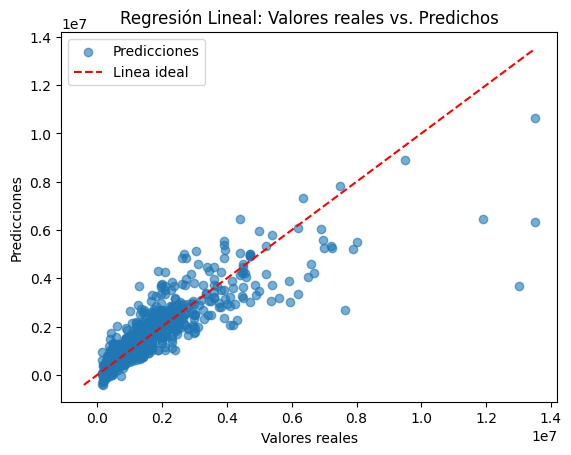

In [102]:
plt.scatter(y_test, y_pred, label="Predicciones", alpha=0.6)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Linea ideal" )

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2: 0.7502718453685413


TypeError: got an unexpected keyword argument 'squared'

In [108]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

Regresión Lineal: R2 = 0.750 | RMSE = 723,451
Random Forest: R2 = 0.842 | RMSE = 574,953
Gradient Boosting: R2 = 0.858 | RMSE = 546,230


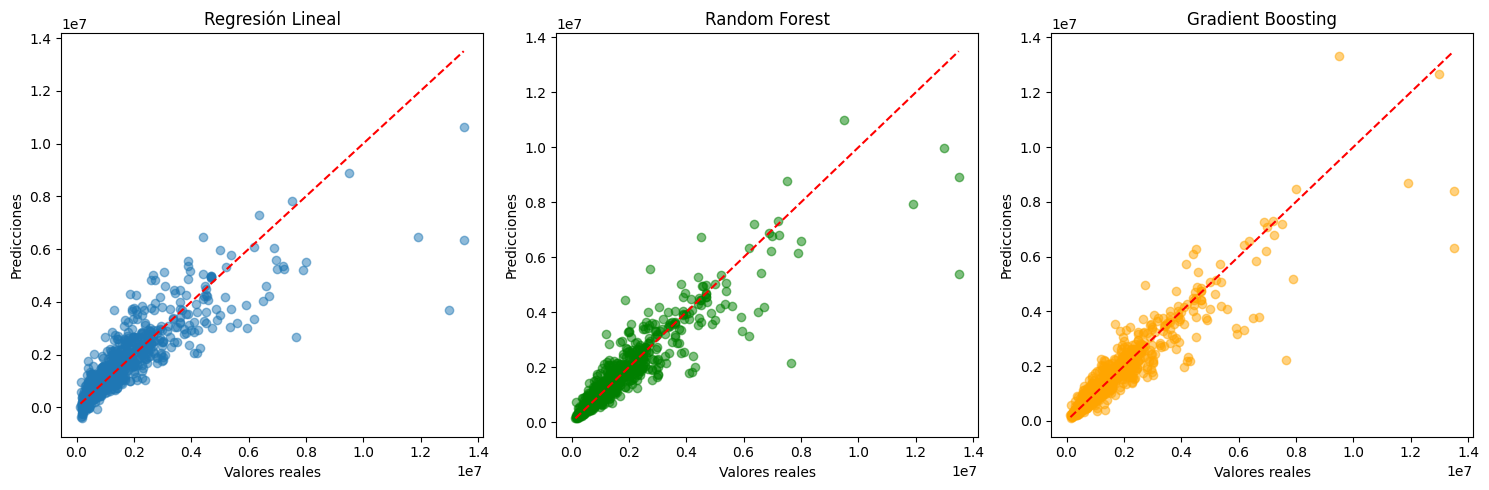

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# =====================================
# 1. Definir variables predictoras y target
# =====================================
X = datos_pisos_r.drop(columns=["precio"])   # todas menos precio
y = datos_pisos_r["precio"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado (solo para la regresión lineal y boosting, no es obligatorio para árboles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================================
# 2. Entrenar modelos
# =====================================

# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
gb_reg.fit(X_train_scaled, y_train)
y_pred_gb = gb_reg.predict(X_test_scaled)

# =====================================
# 3. Evaluación de métricas
# =====================================
def evaluar_modelo(nombre, y_test, y_pred):
    # Calculamos el MSE normal
    mse = mean_squared_error(y_test, y_pred)  
    # Sacamos la raíz cuadrada → RMSE
    rmse = np.sqrt(mse)                       
    # R²
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre}: R2 = {r2:.3f} | RMSE = {rmse:,.0f}")

evaluar_modelo("Regresión Lineal", y_test, y_pred_lin)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("Gradient Boosting", y_test, y_pred_gb)

# =====================================
# 4. Gráfico comparativo (real vs predicho)
# =====================================
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# Lineal
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Regresión Lineal")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

# Random Forest
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="g")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Random Forest")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

# Gradient Boosting
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_gb, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Gradient Boosting")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

plt.tight_layout()
plt.show()

In [113]:
datos_compra.head()

,precio,m2,habitaciones,baños,estado,armarios_empotrados,aire_acondicionado,barrio,distrito,ciudad,Ascensor,EXT-INT,vivienda,precio_m2,tipo_vivienda,Planta_num,barrio_encoded,estado_encoded,EXT-INT_encoded,Ascensor_encoded
0,1690000,145,2,2,Segunda mano/buen estado,True,True,Sol,Centro,Madrid capital,NaN,NaN,Piso,11655.17,Piso,NaN,57,0,2,2
1,895000,106,2,<NA>,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Ático,8443.4,Piso,4.0,50,0,0,1
2,1495000,164,3,3,Segunda mano/buen estado,False,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,9115.85,Piso,2.0,50,0,0,1
3,723000,123,5,2,Segunda mano/buen estado,True,True,Lavapiés-Embajadores,Centro,Madrid capital,No,Exterior,Piso,5878.05,Piso,2.0,38,0,0,0
4,2450000,166,2,2,Segunda mano/buen estado,True,True,Chueca-Justicia,Centro,Madrid capital,Si,Exterior,Piso,14759.04,Piso,2.0,12,0,0,1


In [114]:
datos_compra.head()

,precio,m2,habitaciones,baños,estado,armarios_empotrados,aire_acondicionado,barrio,distrito,ciudad,Ascensor,EXT-INT,vivienda,precio_m2,tipo_vivienda,Planta_num,barrio_encoded,estado_encoded,EXT-INT_encoded,Ascensor_encoded
0,1690000,145,2,2,Segunda mano/buen estado,True,True,Sol,Centro,Madrid capital,NaN,NaN,Piso,11655.17,Piso,NaN,57,0,2,2
1,895000,106,2,<NA>,Segunda mano/buen estado,True,True,Palacio,Centro,Madrid capital,Si,Exterior,Ático,8443.4,Piso,4.0,50,0,0,1
2,1495000,164,3,3,Segunda mano/buen estado,False,True,Palacio,Centro,Madrid capital,Si,Exterior,Piso,9115.85,Piso,2.0,50,0,0,1
3,723000,123,5,2,Segunda mano/buen estado,True,True,Lavapiés-Embajadores,Centro,Madrid capital,No,Exterior,Piso,5878.05,Piso,2.0,38,0,0,0
4,2450000,166,2,2,Segunda mano/buen estado,True,True,Chueca-Justicia,Centro,Madrid capital,Si,Exterior,Piso,14759.04,Piso,2.0,12,0,0,1


In [115]:
datos_compra.to_csv("datos_compra.csv", index=False, sep=";")